# Assignment 1

## Part 1 : Data Pre-processing


### Source Code

```
import pandas as pd
     

# Download the Google Analogy dataset
!wget http://download.tensorflow.org/data/questions-words.txt
     

# Preprocess the dataset
file_name = "questions-words"
with open(f"{file_name}.txt", "r") as f:
    data = f.read().splitlines()
     

# check data from the first 10 entries
for entry in data[:10]:
    print(entry)
     

# TODO1: Write your code here for processing data to pd.DataFrame
# Please note that the first five mentions of ": " indicate `semantic`,
# and the remaining nine belong to the `syntatic` category.
     

# Create the dataframe
df = pd.DataFrame(
    {
        "Question": questions,
        "Category": categories,
        "SubCategory": sub_categories,
    }
)
     

df.head()
     

df.to_csv(f"{file_name}.csv", index=False)

```

### TODO1

In [ ]:
import pandas as pd


# Download the Google Analogy dataset
!wget http://download.tensorflow.org/data/questions-words.txt


# Preprocess the dataset
file_name = "questions-words"
with open(f"{file_name}.txt", "r") as f:
    data = f.read().splitlines()


# check data from the first 10 entries
for entry in data[:10]:
    print(entry)

--2025-09-23 10:51:14--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 172.253.122.207, 172.253.63.207, 142.250.31.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|172.253.122.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.003s  

2025-09-23 10:51:14 (206 MB/s) - ‘questions-words.txt’ saved [603955/603955]

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


* class 型式
  > : {class名稱}   
  > {按照a-z排列的單詞-首都} {國家} {相關a國家首都} {a國家}

In [ ]:
# TODO1: Write your code here for processing data to pd.DataFrame
# Please note that the first five mentions of ": " indicate `semantic`,
# and the remaining nine belong to the `syntatic` category.

# TODO1 #
#=======================================================================#
# Initialize containers
questions = []
categories = []
sub_categories = []

# The first 5 sections are "semantic", the rest are "syntactic"
semantic_sections = 5

current_category = None
current_subcategory = None
section_count = 0

for entry in data:
    if entry.startswith(":"):
        # New sub-category
        current_subcategory = entry[2:]  # remove ": "
        # current_subcategory = entry  # Store the full string including ": "
        # print(current_subcategory)
        section_count += 1
        current_category = "semantic" if section_count <= semantic_sections else "syntactic"
    else:
        # Store question line
        questions.append(entry)
        categories.append(current_category)
        sub_categories.append(current_subcategory)
#=======================================================================#

# Create the dataframe
df = pd.DataFrame(
    {
        "Question": questions,
        "Category": categories,
        "SubCategory": sub_categories,
    }
)


df.head()
df.to_csv(f"{file_name}.csv", index=False)

## Part 2: Use pre-trained word embeddings

### Source Code

```
import pandas as pd
import numpy as np
import gensim.downloader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
     

data = pd.read_csv("questions-words.csv")
     

MODEL_NAME = "glove-wiki-gigaword-100"
# You can try other models.
# https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models

# Load the pre-trained model (using GloVe vectors here)
model = gensim.downloader.load(MODEL_NAME)
print("The Gensim model loaded successfully!")
     

# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

for analogy in tqdm(data["Question"]):
      # TODO2: Write your code here to use pre-trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """
     

# Perform evaluations. You do not need to modify this block!!

def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)
data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data["Category"].unique():
    mask = data["Category"] == category
    golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100}%")

# Evaluation: sub-categories
for sub_category in data["SubCategory"].unique():
    mask = data["SubCategory"] == sub_category
    golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category{sub_category}, Accuracy: {acc_subcat * 100}%")
     

# Collect words from Google Analogy dataset
SUB_CATEGORY = ": family"

# TODO3: Plot t-SNE for the words in the SUB_CATEGORY `: family`


plt.title("Word Relationships from Google Analogy Task")
plt.show()
plt.savefig("word_relationships.png", bbox_inches="tight")
```

### TODO2 - TODO3 module : GloVe

```
Category: semantic, Accuracy: 4.656669297553275%
Category: syntactic, Accuracy: 48.09367681498829%
Sub-Categorycapital-common-countries, Accuracy: 0.0%
Sub-Categorycapital-world, Accuracy: 0.0%
Sub-Categorycurrency, Accuracy: 0.0%
Sub-Categorycity-in-state, Accuracy: 0.0%
Sub-Categoryfamily, Accuracy: 81.62055335968378%
Sub-Categorygram1-adjective-to-adverb, Accuracy: 24.39516129032258%
Sub-Categorygram2-opposite, Accuracy: 20.073891625615765%
Sub-Categorygram3-comparative, Accuracy: 79.12912912912913%
Sub-Categorygram4-superlative, Accuracy: 54.278074866310156%
Sub-Categorygram5-present-participle, Accuracy: 69.50757575757575%
Sub-Categorygram6-nationality-adjective, Accuracy: 0.0%
Sub-Categorygram7-past-tense, Accuracy: 55.44871794871795%
Sub-Categorygram8-plural, Accuracy: 71.996996996997%
Sub-Categorygram9-plural-verbs, Accuracy: 58.39080459770115%
```

In [ ]:
!pip install gensim

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

In [ ]:
import pandas as pd
import numpy as np
import gensim.downloader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


data = pd.read_csv("questions-words.csv")


MODEL_NAME = "glove-wiki-gigaword-100"
# You can try other models.
# https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models

# Load the pre-trained model (using GloVe vectors here)
model = gensim.downloader.load(MODEL_NAME)
print("The Gensim model loaded successfully!")

[==================================================] 100.0% 128.1/128.1MB downloaded
The Gensim model loaded successfully!


In [ ]:
# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

for analogy in tqdm(data["Question"]):
      # TODO2: Write your code here to use pre-trained word embeddings for getting predictions of the analogy task #
      #=======================================================================#
      # You should also preserve the gold answers during iterations for evaluations later.
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """
      words = analogy.split()
      word_a, word_b, word_c, word_d = words[0], words[1], words[2], words[3]

      try:
          # Find the word that is most similar to (word_b - word_a + word_c)
          predicted_word = model.most_similar(positive=[word_b, word_c], negative=[word_a], topn=1)[0][0]
          preds.append(predicted_word)
          golds.append(word_d)
      except KeyError:
          # If a word is not in the model's vocabulary, skip this analogy
          preds.append("N/A")
          golds.append(word_d)

      #=======================================================================#

100%|██████████| 19544/19544 [03:38<00:00, 89.35it/s]


In [ ]:
# Perform evaluations. You do not need to modify this block!!

def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)
data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data["Category"].unique():
    mask = data["Category"] == category
    golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100}%")

# Evaluation: sub-categories
for sub_category in data["SubCategory"].unique():
    mask = data["SubCategory"] == sub_category
    golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category{sub_category}, Accuracy: {acc_subcat * 100}%")

Category: semantic, Accuracy: 4.656669297553275%
Category: syntactic, Accuracy: 48.09367681498829%
Sub-Categorycapital-common-countries, Accuracy: 0.0%
Sub-Categorycapital-world, Accuracy: 0.0%
Sub-Categorycurrency, Accuracy: 0.0%
Sub-Categorycity-in-state, Accuracy: 0.0%
Sub-Categoryfamily, Accuracy: 81.62055335968378%
Sub-Categorygram1-adjective-to-adverb, Accuracy: 24.39516129032258%
Sub-Categorygram2-opposite, Accuracy: 20.073891625615765%
Sub-Categorygram3-comparative, Accuracy: 79.12912912912913%
Sub-Categorygram4-superlative, Accuracy: 54.278074866310156%
Sub-Categorygram5-present-participle, Accuracy: 69.50757575757575%
Sub-Categorygram6-nationality-adjective, Accuracy: 0.0%
Sub-Categorygram7-past-tense, Accuracy: 55.44871794871795%
Sub-Categorygram8-plural, Accuracy: 71.996996996997%
Sub-Categorygram9-plural-verbs, Accuracy: 58.39080459770115%


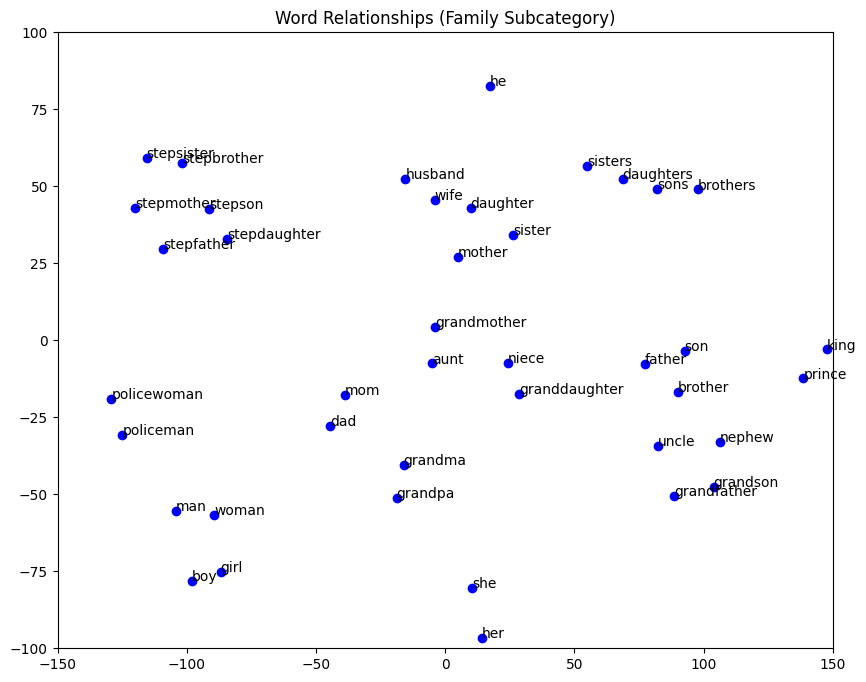

In [ ]:
# Collect words from Google Analogy dataset
# SUB_CATEGORY = ": family"
SUB_CATEGORY = "family"
# TODO3: Plot t-SNE for the words in the SUB_CATEGORY `: family`
# Filter the data for the family sub-category
family_data = data[data["SubCategory"] == SUB_CATEGORY]

# Collect all unique words from the filtered data
family_words = set()
for analogy in family_data["Question"]:
    words = analogy.split()
    family_words.update(words)

# Get the vectors for the words, handling words not in the model's vocabulary
valid_words = [word for word in family_words if word in model.key_to_index]


from sklearn.manifold import TSNE

# ================== Collect vectors ==================
family_vectors = np.array([model[word] for word in valid_words])

# ================== t-SNE 降維 ==================
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
family_vectors_2d = tsne.fit_transform(family_vectors)

# ================== 畫圖 ==================
plt.figure(figsize=(10, 8))
plt.scatter(family_vectors_2d[:, 0], family_vectors_2d[:, 1], c="blue")

# 標上文字
for i, word in enumerate(valid_words):
    plt.annotate(word, (family_vectors_2d[i, 0], family_vectors_2d[i, 1]))

plt.xlim(-150, 150)
plt.ylim(-100, 100)

plt.title("Word Relationships (Family Subcategory)")
plt.savefig("word_relationships_family_zoomed.png", bbox_inches="tight")
plt.show()


### TODO2 - TODO3 module: glove-wiki-gigaword-300

```
Category: semantic, Accuracy: 5.03%
Category: syntactic, Accuracy: 53.13%
Sub-Category: capital-common-countries, Accuracy: 0.00%
Sub-Category: capital-world, Accuracy: 0.00%
Sub-Category: currency, Accuracy: 0.00%
Sub-Category: city-in-state, Accuracy: 0.00%
Sub-Category: family, Accuracy: 88.14%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 22.58%
Sub-Category: gram2-opposite, Accuracy: 27.34%
Sub-Category: gram3-comparative, Accuracy: 88.14%
Sub-Category: gram4-superlative, Accuracy: 72.19%
Sub-Category: gram5-present-participle, Accuracy: 69.98%
Sub-Category: gram6-nationality-adjective, Accuracy: 0.00%
Sub-Category: gram7-past-tense, Accuracy: 61.15%
Sub-Category: gram8-plural, Accuracy: 78.08%
Sub-Category: gram9-plural-verbs, Accuracy: 58.51%
Overall Top-1 Accuracy: 31.30%
Overall Top-5 Accuracy: 40.55%
```

[==================================================] 100.0% 376.1/376.1MB downloaded
The Gensim model loaded successfully!


100%|██████████| 19544/19544 [08:11<00:00, 39.80it/s]


Category: semantic, Accuracy: 5.03%
Category: syntactic, Accuracy: 53.13%
Sub-Category: capital-common-countries, Accuracy: 0.00%
Sub-Category: capital-world, Accuracy: 0.00%
Sub-Category: currency, Accuracy: 0.00%
Sub-Category: city-in-state, Accuracy: 0.00%
Sub-Category: family, Accuracy: 88.14%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 22.58%
Sub-Category: gram2-opposite, Accuracy: 27.34%
Sub-Category: gram3-comparative, Accuracy: 88.14%
Sub-Category: gram4-superlative, Accuracy: 72.19%
Sub-Category: gram5-present-participle, Accuracy: 69.98%
Sub-Category: gram6-nationality-adjective, Accuracy: 0.00%
Sub-Category: gram7-past-tense, Accuracy: 61.15%
Sub-Category: gram8-plural, Accuracy: 78.08%
Sub-Category: gram9-plural-verbs, Accuracy: 58.51%
Overall Top-1 Accuracy: 31.30%
Overall Top-5 Accuracy: 40.55%


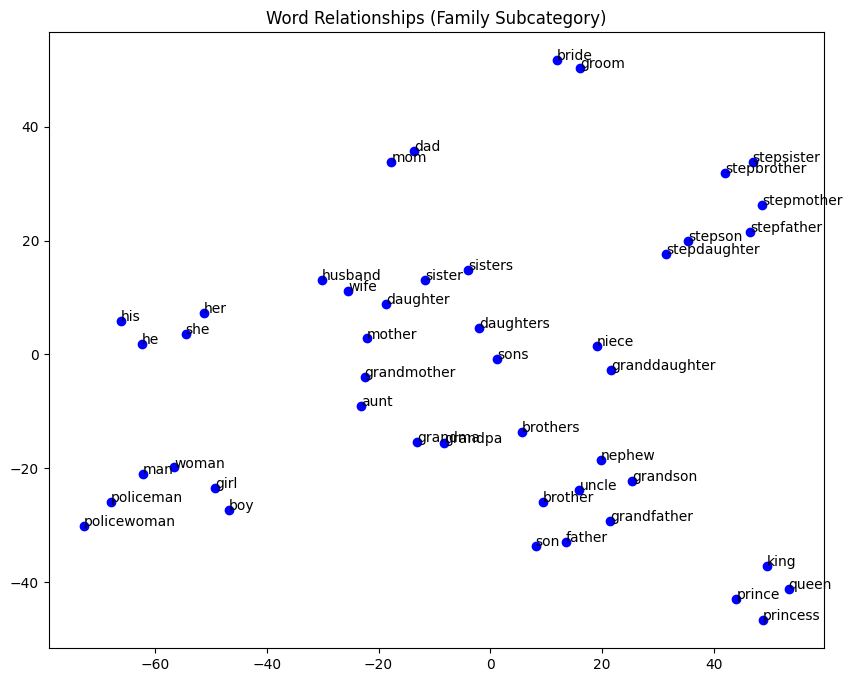

In [ ]:
import pandas as pd
import numpy as np
import gensim.downloader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


data = pd.read_csv("questions-words.csv")

# ================== 換成更強大的模型 ==================
# MODEL_NAME = "word2vec-google-news-300"
# # 如果記憶體不足可以改成 "glove-wiki-gigaword-300"
# model = gensim.downloader.load(MODEL_NAME)
MODEL_NAME = "glove-wiki-gigaword-300"
model = gensim.downloader.load(MODEL_NAME)
print("The Gensim model loaded successfully!")


# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []
top5_correct = []   # 額外紀錄 top-5 準確率

for analogy in tqdm(data["Question"]):
    # ================== TODO2: 改進預測 ================== #
    words = analogy.split()
    word_a, word_b, word_c, word_d = words[0], words[1], words[2], words[3]

    try:
        # 避免 input word 出現在結果裡
        predicted_list = model.most_similar(
            positive=[word_b, word_c],
            negative=[word_a],
            topn=10  # 多抓幾個
        )

        # 過濾掉輸入的詞
        filtered_preds = [w for w, _ in predicted_list if w not in {word_a, word_b, word_c}]

        # top-1 預測
        predicted_word = filtered_preds[0] if filtered_preds else "N/A"
        preds.append(predicted_word)
        golds.append(word_d)

        # top-5 判斷
        if word_d in filtered_preds[:5]:
            top5_correct.append(1)
        else:
            top5_correct.append(0)

    except KeyError:
        preds.append("N/A")
        golds.append(word_d)
        top5_correct.append(0)
    # ==================================================== #

# Perform evaluations. You do not need to modify this block!!

def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)
data = pd.read_csv("questions-words.csv")

# Evaluation: categories
for category in data["Category"].unique():
    mask = data["Category"] == category
    golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100:.2f}%")

# Evaluation: sub-categories
for sub_category in data["SubCategory"].unique():
    mask = data["SubCategory"] == sub_category
    golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category: {sub_category}, Accuracy: {acc_subcat * 100:.2f}%")

# 額外輸出 Top-5 平均準確率
print(f"Overall Top-1 Accuracy: {calculate_accuracy(golds_np, preds_np) * 100:.2f}%")
print(f"Overall Top-5 Accuracy: {np.mean(top5_correct) * 100:.2f}%")

# Collect words from Google Analogy dataset
SUB_CATEGORY = "family"
family_data = data[data["SubCategory"] == SUB_CATEGORY]

family_words = set()
for analogy in family_data["Question"]:
    words = analogy.split()
    family_words.update(words)

valid_words = [word for word in family_words if word in model.key_to_index]

family_vectors = np.array([model[word] for word in valid_words])

tsne = TSNE(n_components=2, random_state=42, perplexity=5)
family_vectors_2d = tsne.fit_transform(family_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(family_vectors_2d[:, 0], family_vectors_2d[:, 1], c="blue")

for i, word in enumerate(valid_words):
    plt.annotate(word, (family_vectors_2d[i, 0], family_vectors_2d[i, 1]))

plt.title("Word Relationships (Family Subcategory)")
plt.savefig("word_relationships_family_zoomed.png", bbox_inches="tight")
plt.show()

### other pretest
```
Category: semantic, Accuracy: 74.30%
Category: syntactic, Accuracy: 53.47%
Sub-Category: capital-common-countries, Accuracy: 94.86%
Sub-Category: capital-world, Accuracy: 92.75%
Sub-Category: currency, Accuracy: 15.47%
Sub-Category: city-in-state, Accuracy: 58.01%
Sub-Category: family, Accuracy: 68.97%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 22.48%
Sub-Category: gram2-opposite, Accuracy: 27.34%
Sub-Category: gram3-comparative, Accuracy: 88.14%
Sub-Category: gram4-superlative, Accuracy: 72.19%
Sub-Category: gram5-present-participle, Accuracy: 69.98%
Sub-Category: gram6-nationality-adjective, Accuracy: 92.56%
Sub-Category: gram7-past-tense, Accuracy: 61.15%
Sub-Category: gram8-plural, Accuracy: 0.00%
Sub-Category: gram9-plural-verbs, Accuracy: 12.18%
Overall Top-1 Accuracy: 62.92%
Overall Top-5 Accuracy: 75.54%
```

In [ ]:
import pandas as pd
import numpy as np
import gensim.downloader
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# ================== Load Data ==================
data = pd.read_csv("questions-words.csv")

# ================== Load Model ==================
MODEL_NAME = "glove-wiki-gigaword-300"
model = gensim.downloader.load(MODEL_NAME)
print("The Gensim model loaded successfully!")

# ================== Preprocessing Tools ==================
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_word(word):
    # 1️⃣ 去非英文字符
    word = re.sub(r'[^a-zA-Z\-]', '', word)
    # 2️⃣ 轉小寫
    word = word.lower()
    # 3️⃣ 去停用詞
    if word in stop_words:
        return None
    # 4️⃣ Lemmatization
    word = lemmatizer.lemmatize(word)
    return word if word else None

def preprocess_analogy(analogy_line):
    words = analogy_line.split()
    processed = [preprocess_word(w) for w in words]
    # 過濾掉 None
    processed = [w for w in processed if w is not None]
    if len(processed) == 4:
        return processed
    else:
        return None

# ================== Predictions ==================
preds = []
golds = []
top5_correct = []

for analogy in tqdm(data["Question"]):
    words = preprocess_analogy(analogy)
    if words is None:
        preds.append("N/A")
        golds.append(analogy.split()[-1])  # 原答案
        top5_correct.append(0)
        continue

    word_a, word_b, word_c, word_d = words

    try:
        predicted_list = model.most_similar(
            positive=[word_b, word_c],
            negative=[word_a],
            topn=10
        )
        # 過濾掉輸入詞
        filtered_preds = [w for w, _ in predicted_list if w not in {word_a, word_b, word_c}]
        predicted_word = filtered_preds[0] if filtered_preds else "N/A"
        preds.append(predicted_word)
        golds.append(word_d)
        top5_correct.append(1 if word_d in filtered_preds[:5] else 0)
    except KeyError:
        preds.append("N/A")
        golds.append(word_d)
        top5_correct.append(0)

# ================== Evaluation ==================
def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:
    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)

# Categories
for category in data["Category"].unique():
    mask = data["Category"] == category
    golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category}, Accuracy: {acc_cat * 100:.2f}%")

# Sub-categories
for sub_category in data["SubCategory"].unique():
    mask = data["SubCategory"] == sub_category
    golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category: {sub_category}, Accuracy: {acc_subcat * 100:.2f}%")

print(f"Overall Top-1 Accuracy: {calculate_accuracy(golds_np, preds_np) * 100:.2f}%")
print(f"Overall Top-5 Accuracy: {np.mean(top5_correct) * 100:.2f}%")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


The Gensim model loaded successfully!


100%|██████████| 19544/19544 [16:56<00:00, 19.22it/s]


Category: semantic, Accuracy: 74.30%
Category: syntactic, Accuracy: 53.47%
Sub-Category: capital-common-countries, Accuracy: 94.86%
Sub-Category: capital-world, Accuracy: 92.75%
Sub-Category: currency, Accuracy: 15.47%
Sub-Category: city-in-state, Accuracy: 58.01%
Sub-Category: family, Accuracy: 68.97%
Sub-Category: gram1-adjective-to-adverb, Accuracy: 22.48%
Sub-Category: gram2-opposite, Accuracy: 27.34%
Sub-Category: gram3-comparative, Accuracy: 88.14%
Sub-Category: gram4-superlative, Accuracy: 72.19%
Sub-Category: gram5-present-participle, Accuracy: 69.98%
Sub-Category: gram6-nationality-adjective, Accuracy: 92.56%
Sub-Category: gram7-past-tense, Accuracy: 61.15%
Sub-Category: gram8-plural, Accuracy: 0.00%
Sub-Category: gram9-plural-verbs, Accuracy: 12.18%
Overall Top-1 Accuracy: 62.92%
Overall Top-5 Accuracy: 75.54%


### 比較圖
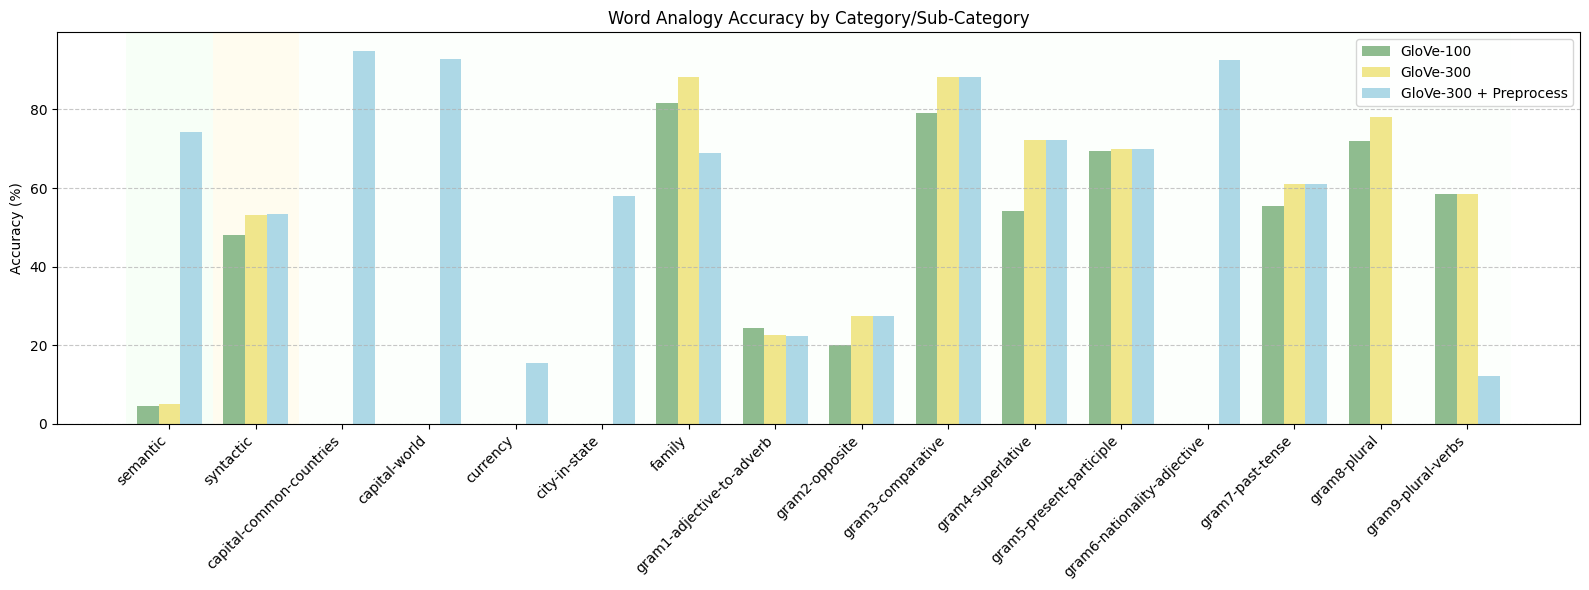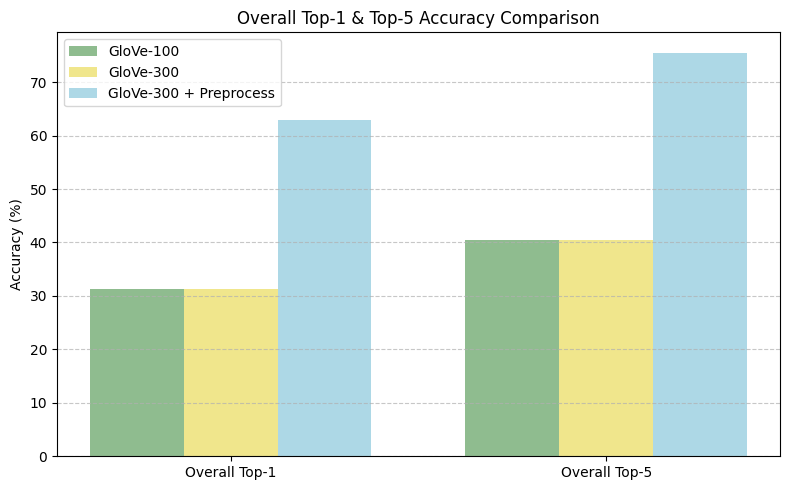

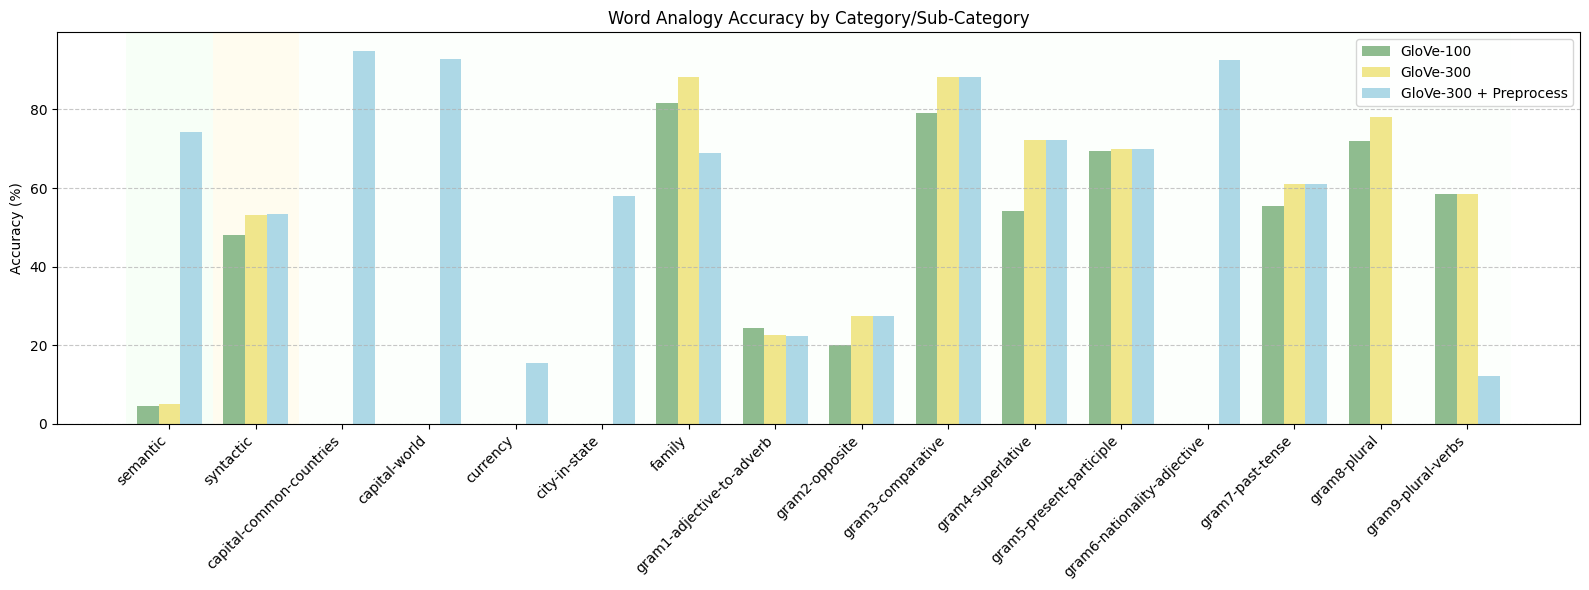

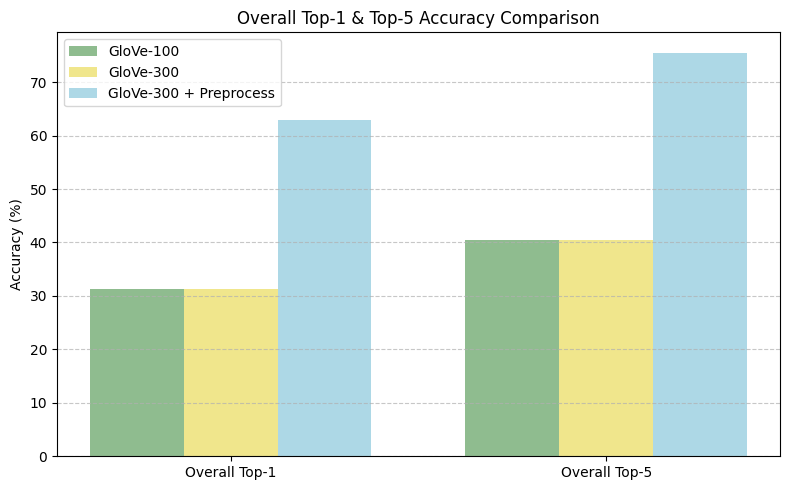

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ================== Categories/Sub-Categories ==================
categories = [
    "semantic", "syntactic",
    "capital-common-countries", "capital-world", "currency", "city-in-state",
    "family", "gram1-adjective-to-adverb", "gram2-opposite", "gram3-comparative",
    "gram4-superlative", "gram5-present-participle", "gram6-nationality-adjective",
    "gram7-past-tense", "gram8-plural", "gram9-plural-verbs"
]

# ================== Overall ==================
overall = ["Overall Top-1", "Overall Top-5"]

# ================== Accuracy Data ==================
acc_glove100 = [
    4.6567, 48.0937, 0.0, 0.0, 0.0, 0.0,
    81.6206, 24.3952, 20.0739, 79.1291,
    54.2781, 69.5076, 0.0,
    55.4487, 71.9970, 58.3908
]
acc_glove300 = [
    5.03, 53.13, 0.0, 0.0, 0.0, 0.0,
    88.14, 22.58, 27.34, 88.14,
    72.19, 69.98, 0.0,
    61.15, 78.08, 58.51
]
acc_glove300_pre = [
    74.30, 53.47, 94.86, 92.75, 15.47, 58.01,
    68.97, 22.48, 27.34, 88.14,
    72.19, 69.98, 92.56,
    61.15, 0.0, 12.18
]

# ================== Overall Accuracy ==================
overall_glove100 = [31.30, 40.55]
overall_glove300 = [31.30, 40.55]
overall_glove300_pre = [62.92, 75.54]

# ================== 顏色 (柔和版) ==================
colors = ['#8FBC8F', '#F0E68C', '#ADD8E6']  # GloVe-100 / GloVe-300 / GloVe-300+Preprocess
bg_colors = ['#e5ffe5', '#fff8cc', '#f0fff0']  # semantic / syntactic / sub-categories 淺色背景

# ================== Figure 1: Categories/Sub-Categories ==================
x = np.arange(len(categories))
width = 0.25

plt.figure(figsize=(16,6))

# 背景區塊
plt.axvspan(-0.5, 0.5, facecolor=bg_colors[0], alpha=0.3)  # semantic
plt.axvspan(0.5, 1.5, facecolor=bg_colors[1], alpha=0.3)   # syntactic
plt.axvspan(1.5, len(categories)-0.5, facecolor=bg_colors[2], alpha=0.15)  # sub-categories

plt.bar(x - width, acc_glove100, width, label='GloVe-100', color=colors[0])
plt.bar(x, acc_glove300, width, label='GloVe-300', color=colors[1])
plt.bar(x + width, acc_glove300_pre, width, label='GloVe-300 + Preprocess', color=colors[2])

plt.xticks(x, categories, rotation=45, ha='right')
plt.ylabel('Accuracy (%)')
plt.title('Word Analogy Accuracy by Category/Sub-Category')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ================== Figure 2: Overall Accuracy ==================
x2 = np.arange(len(overall))
width2 = 0.25

plt.figure(figsize=(8,5))
plt.bar(x2 - width2, overall_glove100, width2, label='GloVe-100', color=colors[0])
plt.bar(x2, overall_glove300, width2, label='GloVe-300', color=colors[1])
plt.bar(x2 + width2, overall_glove300_pre, width2, label='GloVe-300 + Preprocess', color=colors[2])

plt.xticks(x2, overall)
plt.ylabel('Accuracy (%)')
plt.title('Overall Top-1 & Top-5 Accuracy Comparison')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Part 3: Train your own word embeddings
Get the latest English Wikipedia articles and do sampling.
Usually, we start from Wikipedia dump (https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2).
* However, the downloading step will take very long. Also, the cleaning step for the Wikipedia corpus (gensim.corpora.wikicorpus.WikiCorpus) will take much time. Therefore, we provide cleaned files for you.

#### Source Code

```

# Download the split Wikipedia files
# Each file contain 562365 lines (articles).
!gdown --id 1jiu9E1NalT2Y8EIuWNa1xf2Tw1f1XuGd -O wiki_texts_part_0.txt.gz
!gdown --id 1ABblLRd9HXdXvaNv8H9fFq984bhnowoG -O wiki_texts_part_1.txt.gz
!gdown --id 1z2VFNhpPvCejTP5zyejzKj5YjI_Bn42M -O wiki_texts_part_2.txt.gz
!gdown --id 1VKjded9BxADRhIoCzXy_W8uzVOTWIf0g -O wiki_texts_part_3.txt.gz
!gdown --id 16mBeG26m9LzHXdPe8UrijUIc6sHxhknz -O wiki_texts_part_4.txt.gz
     

# Download the split Wikipedia files
# Each file contain 562365 lines (articles), except the last file.
!gdown --id 17JFvxOH-kc-VmvGkhG7p3iSZSpsWdgJI -O wiki_texts_part_5.txt.gz
!gdown --id 19IvB2vOJRGlrYulnTXlZECR8zT5v550P -O wiki_texts_part_6.txt.gz
!gdown --id 1sjwO8A2SDOKruv6-8NEq7pEIuQ50ygVV -O wiki_texts_part_7.txt.gz
!gdown --id 1s7xKWJmyk98Jbq6Fi1scrHy7fr_ellUX -O wiki_texts_part_8.txt.gz
!gdown --id 17eQXcrvY1cfpKelLbP2BhQKrljnFNykr -O wiki_texts_part_9.txt.gz
!gdown --id 1J5TAN6bNBiSgTIYiPwzmABvGhAF58h62 -O wiki_texts_part_10.txt.gz
     

# Extract the downloaded wiki_texts_parts files.
!gunzip -k wiki_texts_part_*.gz
     

# Combine the extracted wiki_texts_parts files.
!cat wiki_texts_part_*.txt > wiki_texts_combined.txt
     

# Check the first ten lines of the combined file
!head -n 10 wiki_texts_combined.txt
```

Please note that we used the default parameters of gensim.corpora.wikicorpus.WikiCorpus for cleaning the Wiki raw file. Thus, words with one character were discarded.

```
# Now you need to do sampling because the corpus is too big.
# You can further perform analysis with a greater sampling ratio.

import random

wiki_txt_path = "wiki_texts_combined.txt"
# wiki_texts_combined.txt is a text file separated by linebreaks (\n).
# Each row in wiki_texts_combined.txt indicates a Wikipedia article.

with open(wiki_txt_path, "r", encoding="utf-8") as f:
    with open(output_path, "w", encoding="utf-8") as output_file:
    # TODO4: Sample `20%` Wikipedia articles
    # Write your code here
     

# TODO5: Train your own word embeddings with the sampled articles
# https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec
# Hint: You should perform some pre-processing before training.
     

data = pd.read_csv("questions-words.csv")
     

# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []

for analogy in tqdm(data["Question"]):
      # TODO6: Write your code here to use your trained word embeddings for getting predictions of the analogy task.
      # You should also preserve the gold answers during iterations for evaluations later.
      """ Hints
      # Unpack the analogy (e.g., "man", "woman", "king", "queen")
      # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
      # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
      # Mikolov et al., 2013: big - biggest and small - smallest
      # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
      """
     

# Collect words from Google Analogy dataset
SUB_CATEGORY = ": family"

# TODO7: Plot t-SNE for the words in the SUB_CATEGORY `: family`


plt.title("Word Relationships from Google Analogy Task")
plt.show()
plt.savefig("word_relationships.png", bbox_inches="tight")
```

####  sample download

In [ ]:
# 安裝 gdown (Google Drive 下載工具)
!pip install gdown -q

# 從 Google Drive 下載檔案
# 檔案 ID 是 "1t4cqlZEgiRJCJJOzHeja3AjU1jTWiDRa"
!gdown --id 1t4cqlZEgiRJCJJOzHeja3AjU1jTWiDRa -O wiki_texts.zip

# 解壓縮下載的檔案
!unzip -o wiki_texts.zip -d wiki_texts

# 查看解壓後資料夾的檔案列表
!ls -lh wiki_texts

# 顯示其中一個檔案的前 10 行 (如果是 .txt 檔)
!head -n 10 wiki_texts/* | head -n 10


#### TODO4

In [ ]:
import glob
import random
import gzip
import shutil
import os

input_folder = "wiki_texts"
ratios = [0.05, 0.10, 0.20]

# 先建立抽樣檔案的容器
sampled_lines_dict = {r: [] for r in ratios}

for gz_file in sorted(glob.glob(f"{input_folder}/*.gz")):
    txt_file = gz_file.replace(".gz", "")

    # 1解壓縮單個檔案到暫存 txt
    with gzip.open(gz_file, "rt", encoding="utf-8") as fin, open(txt_file, "w", encoding="utf-8") as fout:
        shutil.copyfileobj(fin, fout)
    print(f"解壓縮完成: {txt_file}")

    # 2讀取 txt 並抽樣
    with open(txt_file, "r", encoding="utf-8") as f:
        lines = f.readlines()
        for r in ratios:
            k = int(len(lines) * r)
            sampled_lines_dict[r].extend(random.sample(lines, k))

    # 3刪掉暫存 txt，節省空間
    os.remove(txt_file)
    print(f"刪除暫存檔: {txt_file}")

# 4將抽樣結果寫成各自的 sample 檔案
for r in ratios:
    output_path = f"wiki_texts_sampled_{int(r*100)}.txt"
    with open(output_path, "w", encoding="utf-8") as out_f:
        out_f.writelines(sampled_lines_dict[r])
    print(f"\n{int(r*100)}% sample 已寫入 {output_path}，共 {len(sampled_lines_dict[r])} 篇文章")

解壓縮完成: wiki_texts/wiki_texts_part_0.txt
刪除暫存檔: wiki_texts/wiki_texts_part_0.txt
解壓縮完成: wiki_texts/wiki_texts_part_1.txt
刪除暫存檔: wiki_texts/wiki_texts_part_1.txt
解壓縮完成: wiki_texts/wiki_texts_part_10.txt
刪除暫存檔: wiki_texts/wiki_texts_part_10.txt
解壓縮完成: wiki_texts/wiki_texts_part_2.txt
刪除暫存檔: wiki_texts/wiki_texts_part_2.txt
解壓縮完成: wiki_texts/wiki_texts_part_3.txt
刪除暫存檔: wiki_texts/wiki_texts_part_3.txt
解壓縮完成: wiki_texts/wiki_texts_part_4.txt
刪除暫存檔: wiki_texts/wiki_texts_part_4.txt
解壓縮完成: wiki_texts/wiki_texts_part_5.txt
刪除暫存檔: wiki_texts/wiki_texts_part_5.txt
解壓縮完成: wiki_texts/wiki_texts_part_6.txt
刪除暫存檔: wiki_texts/wiki_texts_part_6.txt
解壓縮完成: wiki_texts/wiki_texts_part_7.txt
刪除暫存檔: wiki_texts/wiki_texts_part_7.txt
解壓縮完成: wiki_texts/wiki_texts_part_8.txt
刪除暫存檔: wiki_texts/wiki_texts_part_8.txt
解壓縮完成: wiki_texts/wiki_texts_part_9.txt
刪除暫存檔: wiki_texts/wiki_texts_part_9.txt

✅ 5% sample 已寫入 wiki_texts_sampled_5.txt，共 281180 篇文章

✅ 10% sample 已寫入 wiki_texts_sampled_10.txt，共 562360 篇文章

✅ 20%

In [ ]:
# 壓縮
!zip -r wiki_texts_sampled.zip wiki_texts_sampled_*.txt


  adding: wiki_texts_sampled_10.txt (deflated 66%)
  adding: wiki_texts_sampled_20.txt (deflated 66%)
  adding: wiki_texts_sampled_5.txt (deflated 66%)


In [ ]:
# download
from google.colab import files
files.download("wiki_texts_sampled.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### TODO5
1. 用另一個link download
2. 前置處理(且分別sample 5%/10%/20% 文章到各個檔案)
3. 存檔

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 20.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0;

In [ ]:
# 解壓縮 wiki_texts_sampled.zip
!unzip -o wiki_texts_sampled.zip -d wiki_texts_sampled

# 查看解壓後資料夾的檔案列表
!ls -lh wiki_texts_sampled

unzip:  cannot find or open wiki_texts_sampled.zip, wiki_texts_sampled.zip.zip or wiki_texts_sampled.zip.ZIP.
ls: cannot access 'wiki_texts_sampled': No such file or directory


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# 安裝 nltk 資料
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_word(word):
    # 去掉非英文字符 (保留字母和連字號)
    word = re.sub(r'[^a-zA-Z\-]', '', word)
    # 轉小寫
    word = word.lower()
    # 去停用詞
    if word in stop_words:
        return None
    # Lemmatization
    word = lemmatizer.lemmatize(word)
    return word if word else None

def preprocess_line(line):
    tokens = line.strip().split()  # 簡單空格斷詞
    processed = []
    for w in tokens:
        pw = preprocess_word(w)
        if pw:
            processed.append(pw)
    return processed

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
import itertools
import os

def read_in_chunks(file_object, chunk_size=1000):
    """每次讀入 chunk_size 行"""
    while True:
        lines = list(itertools.islice(file_object, chunk_size))
        if not lines:
            break
        yield lines

sample_files = [
    "wiki_texts_sampled//wiki_texts_sampled_5.txt",
    "wiki_texts_sampled/wiki_texts_sampled_10.txt",
    "wiki_texts_sampled/wiki_texts_sampled_20.txt"
]

output_dir = "/wiki_tests_sampled/processed"
os.makedirs(output_dir, exist_ok=True)

for fpath in sample_files:
    output_path = os.path.join(output_dir, os.path.basename(fpath).replace(".txt", "_processed.txt"))

    with open(fpath, "r", encoding="utf-8") as f, open(output_path, "w", encoding="utf-8") as out_f:
        for chunk in read_in_chunks(f, chunk_size=10000):
            for line in chunk:
                tokens = preprocess_line(line)
                if tokens:
                    out_f.write(" ".join(tokens) + "\n")

    print(f"{fpath} 處理完成，結果已存到 {output_path}")


KeyboardInterrupt: 

#### TODO6

##### predo

In [ ]:
# 壓縮檔案
# /wiki_tests_sampled/processed/wiki_texts_sampled_5_processed.txt
# /wiki_tests_sampled/processed/wiki_texts_sampled_10_processed.txt
# /wiki_tests_sampled/processed/wiki_texts_sampled_20_processed.txt

!zip -r wiki_texts_sampled_processed.zip /wiki_tests_sampled/processed/*
# 下載
!gdown --id wiki_texts_sampled_processed.zip

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0;

In [ ]:
#link to drive
from google.colab import drive
drive.mount('/content/drive')

# download https://drive.google.com/file/d/19GVe8NTCpnnDslIC-3Cm5bVamC-pM5gz/view?usp=sharing
!gdown --id 19GVe8NTCpnnDslIC-3Cm5bVamC-pM5gz -O wiki_texts_sampled_processed.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=19GVe8NTCpnnDslIC-3Cm5bVamC-pM5gz
From (redirected): https://drive.google.com/uc?id=19GVe8NTCpnnDslIC-3Cm5bVamC-pM5gz&confirm=t&uuid=67d58988-8950-48d5-a725-7c8cf9b66e64
To: /content/wiki_texts_sampled_processed.zip
100% 1.91G/1.91G [00:22<00:00, 83.8MB/s]


##### 跑 5 10 20 model

In [ ]:
from gensim.models import Word2Vec

In [ ]:
from gensim.models import Word2Vec

sample_files = {
    "5%": "/content/wiki_texts_sampled_processed/wiki_tests_sampled/processed/wiki_texts_sampled_5_processed.txt"
}

for label, fpath in sample_files.items():
    print(f"\nLoading processed {label} sample...")
    articles = []
    with open(fpath, "r", encoding="utf-8") as f:
        for line in f:
            tokens = line.strip().split()
            if tokens:
                articles.append(tokens)

    print(f"{label} sample loaded: {len(articles)} articles")

    # 訓練 Word2Vec
    print(f"Training Word2Vec for {label} sample...")
    model = Word2Vec(
        sentences=articles,
        vector_size=100,
        window=5,
        min_count=5,
        workers=4,
        sg=1
    )

    # 存檔模型
    model_file = f"word2vec_{label}.model"
    model.save(model_file)
    print(f"{label} model saved to {model_file}")

    # 釋放記憶體
    del articles
    del model



Loading processed 5% sample...
5% sample loaded: 281180 articles
Training Word2Vec for 5% sample...
5% model saved to word2vec_5%.model


In [ ]:
from gensim.models import Word2Vec

sample_files = {
    "10%": "/content/wiki_texts_sampled_processed/wiki_tests_sampled/processed/wiki_texts_sampled_10_processed.txt"
}

# 建立一個 generator class
class WikiCorpus:
    def __init__(self, file_path):
        self.file_path = file_path

    def __iter__(self):
        with open(self.file_path, "r", encoding="utf-8") as f:
            for line in f:
                tokens = line.strip().split()
                if tokens:
                    yield tokens

for label, fpath in sample_files.items():
    print(f"\nProcessing {label} sample...")

    corpus = WikiCorpus(fpath)  # generator，不會一次讀進 RAM

    print(f"Training Word2Vec for {label} sample...")
    model = Word2Vec(
        sentences=corpus,
        vector_size=100,
        window=5,
        min_count=5,
        workers=4,
        sg=1
    )

    # 存檔模型
    model_file = f"word2vec_{label}.model"
    model.save(model_file)
    print(f"{label} model saved to {model_file}")

    # 釋放記憶體
    del model
    del corpus



Processing 10% sample...
Training Word2Vec for 10% sample...
10% model saved to word2vec_10%.model


In [ ]:
from gensim.models import Word2Vec

class ArticleIterator:
    def __init__(self, filepath):
        self.filepath = filepath

    def __iter__(self):
        with open(self.filepath, "r", encoding="utf-8") as f:
            for line in f:
                tokens = line.strip().split()
                if tokens:
                    yield tokens

sample_files = {
    "20%": "/content/wiki_texts_sampled_processed/wiki_tests_sampled/processed/wiki_texts_sampled_20_processed.txt"
}

for label, fpath in sample_files.items():
    print(f"\nLoading iterator for {label} sample...")

    # 不再存進 list，直接用 generator
    sentences = ArticleIterator(fpath)

    # 訓練 Word2Vec
    print(f"Training Word2Vec for {label} sample...")
    model = Word2Vec(
        sentences=sentences,
        vector_size=100,
        window=5,
        min_count=5,
        workers=4,
        sg=1
    )

    # 存檔模型
    model_file = f"word2vec_{label}.model"
    model.save(model_file)
    print(f"{label} model saved to {model_file}")



Loading iterator for 20% sample...
Training Word2Vec for 20% sample...
20% model saved to word2vec_20%.model


In [ ]:
# zip  models and .npy into single zip file and download
!zip -r word2vec.zip word2vec_20%.model word2vec_20%.model.syn1neg.npy word2vec_20%.model.wv.vectors.npy word2vec_10%.model word2vec_10%.model.syn1neg.npy word2vec_10%.model.wv.vectors.npy word2vec_5%.model word2vec_5%.model.syn1neg.npy word2vec_5%.model.wv.vectors.npy

  adding: word2vec_20%.model (deflated 72%)
  adding: word2vec_20%.model.syn1neg.npy (deflated 7%)
  adding: word2vec_20%.model.wv.vectors.npy (deflated 7%)
  adding: word2vec_10%.model (deflated 72%)
  adding: word2vec_10%.model.syn1neg.npy (deflated 7%)
  adding: word2vec_10%.model.wv.vectors.npy (deflated 7%)
  adding: word2vec_5%.model (deflated 72%)
  adding: word2vec_5%.model.syn1neg.npy (deflated 7%)
  adding: word2vec_5%.model.wv.vectors.npy (deflated 7%)


##### TODO


In [ ]:
# # ---------------------
# # 類比任務預測
# # ---------------------
# data = pd.read_csv("questions-words.csv")
# # Do predictions and preserve the gold answers (word_D)
# preds = []
# golds = []


# for analogy in tqdm(data["Question"]):
#       # TODO6: Write your code here to use your trained word embeddings for getting predictions of the analogy task.
#       # You should also preserve the gold answers during iterations for evaluations later.
#       """ Hints
#       # Unpack the analogy (e.g., "man", "woman", "king", "queen")
#       # Perform vector arithmetic: word_b + word_c - word_a should be close to word_d
#       # Source: https://github.com/piskvorky/gensim/blob/develop/gensim/models/keyedvectors.py#L776
#       # Mikolov et al., 2013: big - biggest and small - smallest
#       # Mikolov et al., 2013: X = vector(”biggest”) − vector(”big”) + vector(”small”).
#       """


In [ ]:
from gensim.models import Word2Vec
from tqdm import tqdm
import pandas as pd

def evaluate_analogy(model_path, analogy_file="questions-words.csv"):
    # 載入模型
    print(f"\nLoading model: {model_path}")
    model = Word2Vec.load(model_path)
    wv = model.wv

    # 載入 CSV
    df = pd.read_csv(analogy_file)

    print(f"Total analogy questions: {len(df)}")

    preds, golds = [], []
    for q in tqdm(df["Question"]):
        parts = q.strip().split()
        if len(parts) == 4:
            a, b, c, d = parts
        else:
            continue  # 跳過不合格式的行

        try:
            pred = wv.most_similar(positive=[b, c], negative=[a], topn=1)[0][0]
        except KeyError:
            pred = None
        preds.append(pred)
        golds.append(d)

    # 計算準確率
    correct = sum([p == g for p, g in zip(preds, golds) if p is not None])
    total = sum([p is not None for p in preds])
    accuracy = correct / total if total > 0 else 0.0

    print(f"Evaluated: {total}, Correct: {correct}, Accuracy: {accuracy:.4f}")
    return accuracy


In [ ]:
# 只跑 5% 模型
evaluate_analogy("word2vec_5%.model")




Loading model: word2vec_5%.model
Total analogy questions: 19544


100%|██████████| 19544/19544 [03:06<00:00, 105.00it/s]

Evaluated: 7553, Correct: 2116, Accuracy: 0.2802


0.2801535813584006

In [ ]:
# 跑完再換 10%
evaluate_analogy("word2vec_10%.model")




Loading model: word2vec_10%.model
Total analogy questions: 19544


100%|██████████| 19544/19544 [04:19<00:00, 75.18it/s]

Evaluated: 7586, Correct: 2289, Accuracy: 0.3017


0.3017400474558397

In [ ]:
# 跑完再換 20%
evaluate_analogy("word2vec_20%.model")



Loading model: word2vec_20%.model
Total analogy questions: 19544


100%|██████████| 19544/19544 [07:10<00:00, 45.44it/s]

Evaluated: 7586, Correct: 2438, Accuracy: 0.3214


0.32138149222251516

#### TODO7

In [ ]:
from gensim.models import Word2Vec
import pandas as pd
from tqdm import tqdm

# 準備模型檔案
model_files = {
    "5%": "word2vec_5%.model",
    "10%": "word2vec_10%.model",
    "20%": "word2vec_20%.model"
}

# 讀取類比測試資料
data = pd.read_csv("questions-words.csv")

# 存放每個模型的結果
results = {}

for label, model_file in model_files.items():
    print(f"\nLoading {label} model for analogy task...")
    model = Word2Vec.load(model_file)

    correct = 0
    total = 0
    preds = []
    golds = []

    for analogy in tqdm(data["Question"]):
        try:
            a, b, c, d = analogy.split()
            # 類比公式: b + c - a
            pred = model.wv.most_similar(positive=[b, c], negative=[a], topn=1)[0][0]
            preds.append(pred)
            golds.append(d)

            if pred.lower() == d.lower():
                correct += 1
            total += 1
        except KeyError:
            # 詞不在詞彙表裡就跳過
            continue
        except ValueError:
            # split失敗就跳過
            continue

    acc = correct / total if total > 0 else 0
    results[label] = {
        "accuracy": acc,
        "preds": preds,
        "golds": golds
    }

    print(f"{label} model analogy accuracy: {acc:.4f}")

    # 釋放模型記憶體
    del model

# 顯示三個模型的準確率比較
for label, res in results.items():
    print(f"{label} sample Word2Vec analogy accuracy: {res['accuracy']:.4f}")




Loading 5% model for analogy task...


100%|██████████| 19544/19544 [03:09<00:00, 103.14it/s]


5% model analogy accuracy: 0.2802

Loading 10% model for analogy task...


100%|██████████| 19544/19544 [04:26<00:00, 73.44it/s]


10% model analogy accuracy: 0.3017

Loading 20% model for analogy task...


100%|██████████| 19544/19544 [07:03<00:00, 46.17it/s]

20% model analogy accuracy: 0.3214
5% sample Word2Vec analogy accuracy: 0.2802
10% sample Word2Vec analogy accuracy: 0.3017
20% sample Word2Vec analogy accuracy: 0.3214


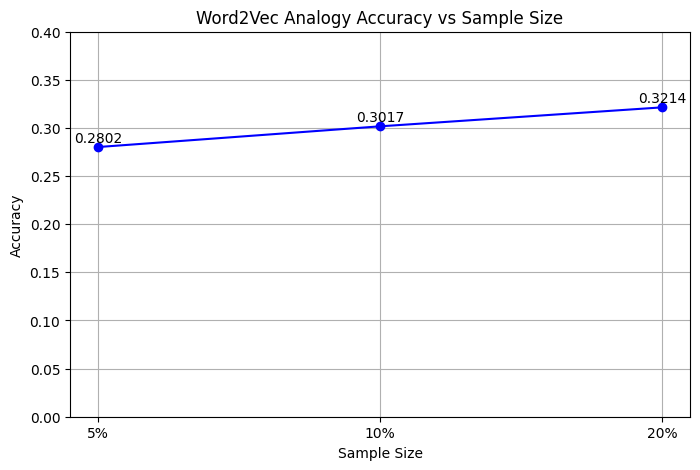

In [ ]:
# 5% sample Word2Vec analogy accuracy: 0.2802
# 10% sample Word2Vec analogy accuracy: 0.3017
# 20% sample Word2Vec analogy accuracy: 0.3214
# draw graph
import matplotlib.pyplot as plt

samples = ["5%", "10%", "20%"]
accuracy = [0.2802, 0.3017, 0.3214]

plt.figure(figsize=(8,5))
plt.plot(samples, accuracy, marker='o', linestyle='-', color='blue')
plt.title("Word2Vec Analogy Accuracy vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Accuracy")
plt.ylim(0, 0.4)
plt.grid(True)
for x, y in zip(samples, accuracy):
    plt.text(x, y+0.005, f"{y:.4f}", ha='center')
plt.show()



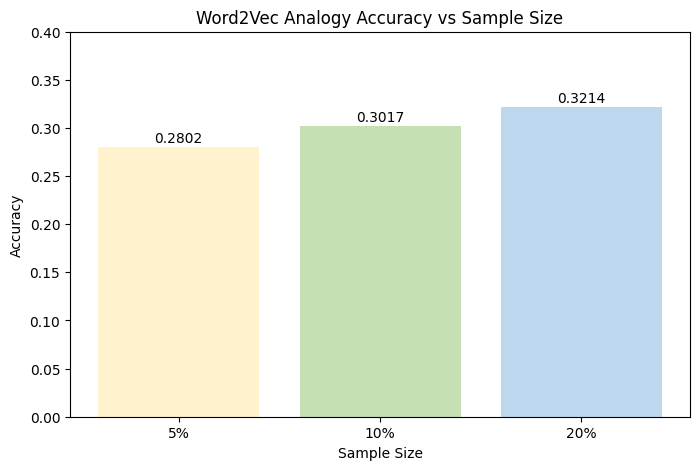

In [ ]:
import matplotlib.pyplot as plt

samples = ["5%", "10%", "20%"]
accuracy = [0.2802, 0.3017, 0.3214]

plt.figure(figsize=(8,5))
colors = ['#FFF2CC', '#C6E0B4', '#BDD7EE']  # 淺黃色、柔和綠、淺藍
plt.bar(samples, accuracy, color=colors)
plt.title("Word2Vec Analogy Accuracy vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Accuracy")
plt.ylim(0, 0.4)

for i, v in enumerate(accuracy):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=10)

plt.show()


Processing model: 5%


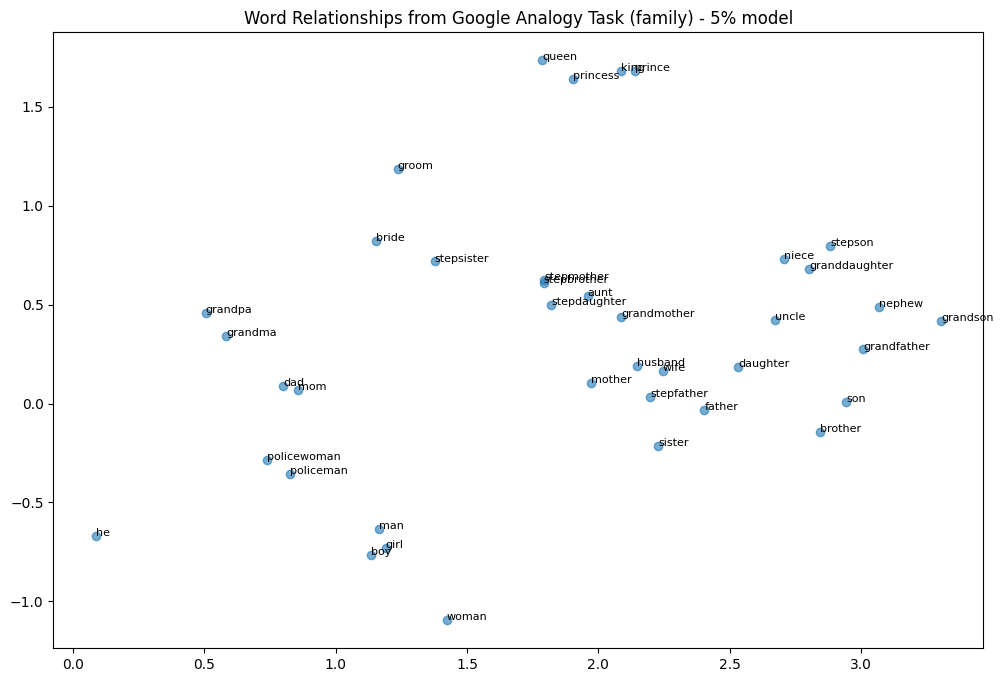

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processing model: 10%


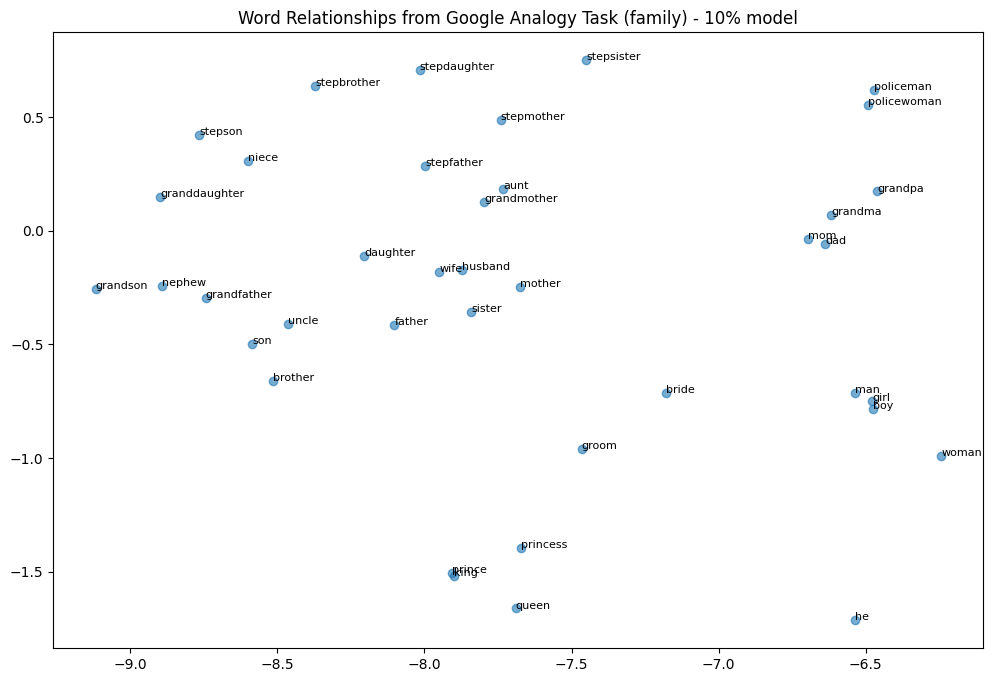

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processing model: 20%


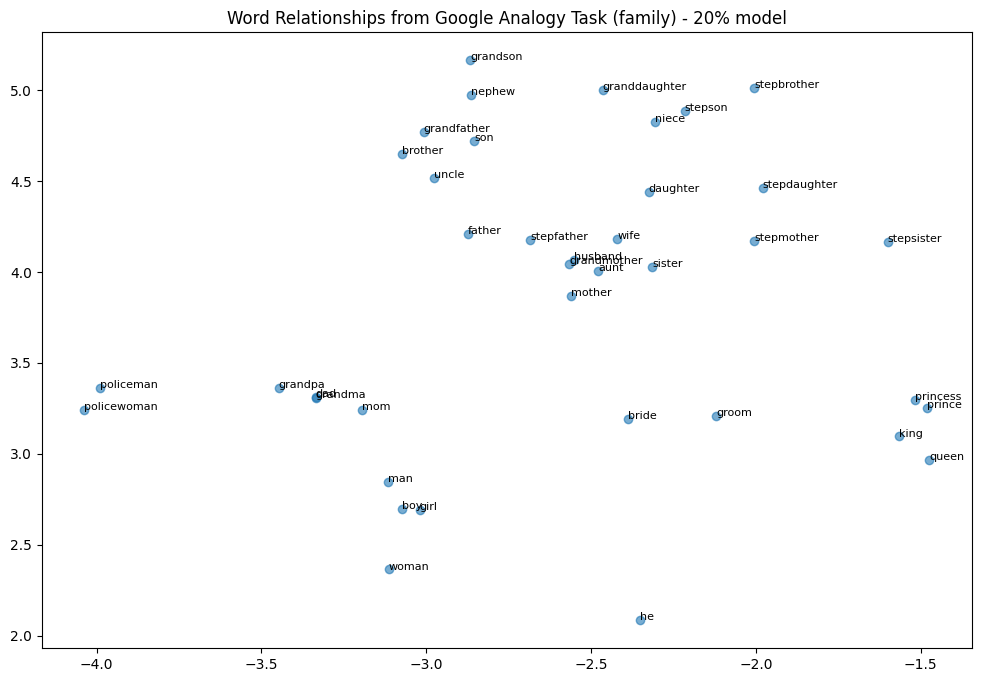

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np

# 過濾 family 類別
family_rows = data[data["SubCategory"] == "family"]

family_words = []
for q in family_rows["Question"]:
    try:
        a, b, c, d = q.split()
        family_words.extend([a, b, c, d])
    except:
        continue

family_words = list(set(family_words))  # 去重

# 模型路徑
model_paths = {
    "5%": "word2vec_5%.model",
    "10%": "word2vec_10%.model",
    "20%": "word2vec_20%.model"
}

for label, path in model_paths.items():
    print(f"Processing model: {label}")
    model = Word2Vec.load(path)

    # 過濾模型中有的詞
    words_in_model = [w for w in family_words if w in model.wv]
    if not words_in_model:
        print(f"No words found in model {label}, skipping.")
        continue

    vectors = np.array([model.wv[w] for w in words_in_model])
    tsne = TSNE(n_components=2, random_state=42)
    vec_2d = tsne.fit_transform(vectors)

    # 畫圖
    plt.figure(figsize=(12, 8))
    plt.scatter(vec_2d[:, 0], vec_2d[:, 1], alpha=0.6)
    for i, word in enumerate(words_in_model):
        plt.text(vec_2d[i, 0], vec_2d[i, 1], word, fontsize=8)

    plt.title(f"Word Relationships from Google Analogy Task (family) - {label} model")
    plt.savefig(f"word_relationships_{label}.png", bbox_inches="tight")
    plt.show()

    # 下載
    from google.colab import files
    files.download(f"word_relationships_{label}.png")

    # 釋放記憶體
    del model


#### Result
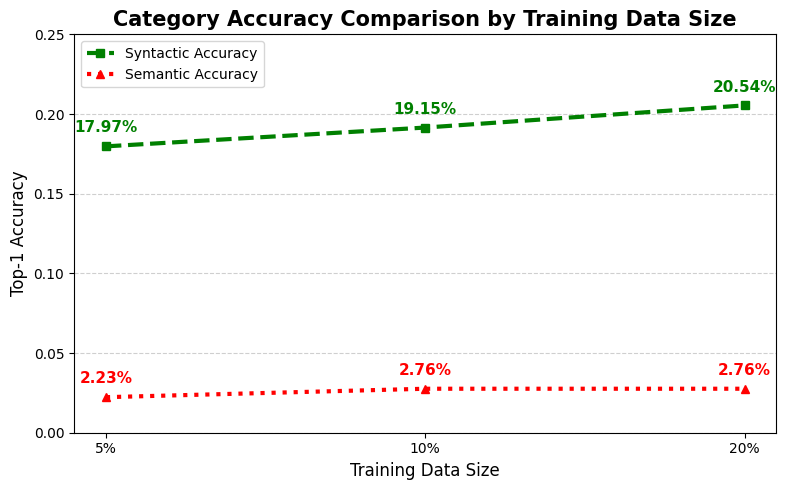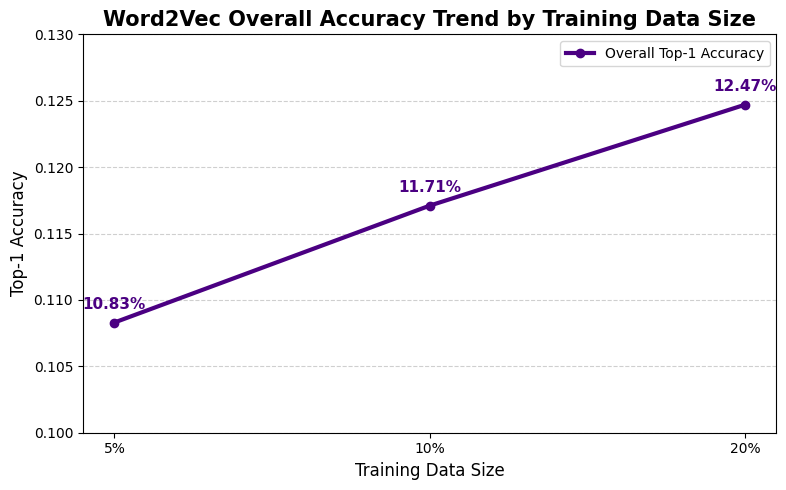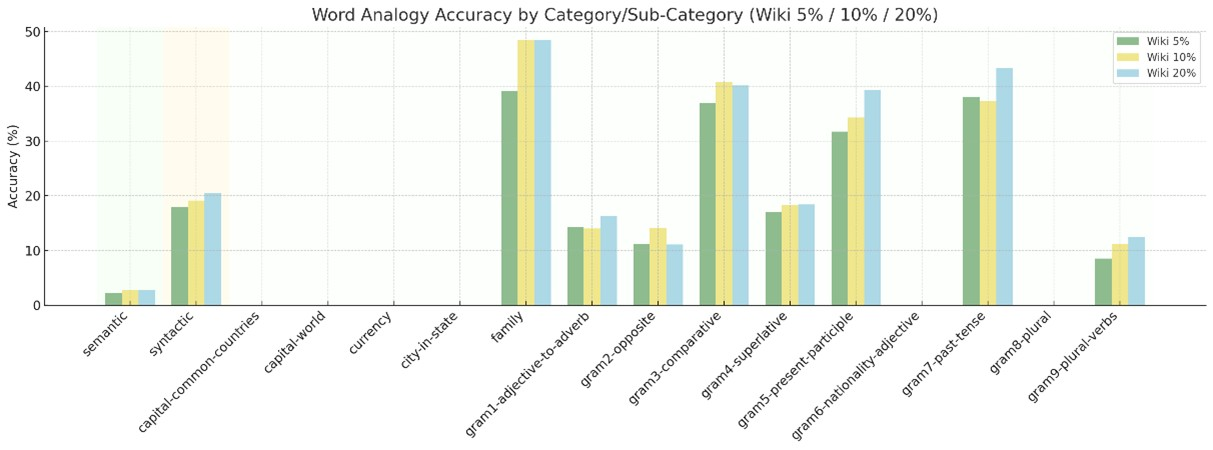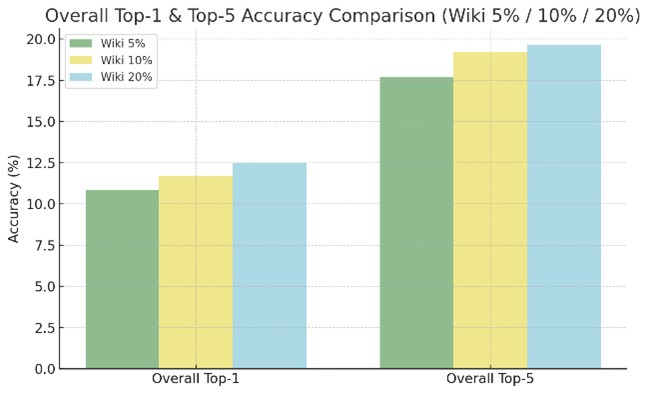


In [ ]:
from gensim.models import Word2Vec
import pandas as pd
from tqdm import tqdm

# 準備模型檔案
model_files = {
    "5%": "word2vec_5%.model",
    "10%": "word2vec_10%.model",
    "20%": "word2vec_20%.model"
}

# 讀取類比測試資料
data = pd.read_csv("questions-words.csv")

# 存放每個模型的結果
results = {}

for label, model_file in model_files.items():
    print(f"\nLoading {label} model for analogy task...")
    model = Word2Vec.load(model_file)

    correct = 0
    total = 0
    preds = []
    golds = []

    for analogy in tqdm(data["Question"]):
        try:
            a, b, c, d = analogy.split()
            # 類比公式: b + c - a
            pred = model.wv.most_similar(positive=[b, c], negative=[a], topn=1)[0][0]
            preds.append(pred)
            golds.append(d)

            if pred.lower() == d.lower():
                correct += 1
            total += 1
        except KeyError:
            # 詞不在詞彙表裡就跳過
            continue
        except ValueError:
            # split失敗就跳過
            continue

    acc = correct / total if total > 0 else 0
    results[label] = {
        "accuracy": acc,
        "preds": preds,
        "golds": golds
    }

    print(f"{label} model analogy accuracy: {acc:.4f}")

    # 釋放模型記憶體
    del model

# 顯示三個模型的準確率比較
for label, res in results.items():
    print(f"{label} sample Word2Vec analogy accuracy: {res['accuracy']:.4f}")



In [ ]:
import matplotlib.pyplot as plt

samples = ["5%", "10%", "20%"]
accuracy = [0.2802, 0.3017, 0.3214]

plt.figure(figsize=(8,5))
colors = ['#FFF2CC', '#C6E0B4', '#BDD7EE']  # 淺黃色、柔和綠、淺藍
plt.bar(samples, accuracy, color=colors)
plt.title("Word2Vec Analogy Accuracy vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Accuracy")
plt.ylim(0, 0.4)

for i, v in enumerate(accuracy):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=10)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np

# 過濾 family 類別
family_rows = data[data["SubCategory"] == "family"]

family_words = []
for q in family_rows["Question"]:
    try:
        a, b, c, d = q.split()
        family_words.extend([a, b, c, d])
    except:
        continue

family_words = list(set(family_words))  # 去重

# 模型路徑
model_paths = {
    "5%": "word2vec_5%.model",
    "10%": "word2vec_10%.model",
    "20%": "word2vec_20%.model"
}

for label, path in model_paths.items():
    print(f"Processing model: {label}")
    model = Word2Vec.load(path)

    # 過濾模型中有的詞
    words_in_model = [w for w in family_words if w in model.wv]
    if not words_in_model:
        print(f"No words found in model {label}, skipping.")
        continue

    vectors = np.array([model.wv[w] for w in words_in_model])
    tsne = TSNE(n_components=2, random_state=42)
    vec_2d = tsne.fit_transform(vectors)

    # 畫圖
    plt.figure(figsize=(12, 8))
    plt.scatter(vec_2d[:, 0], vec_2d[:, 1], alpha=0.6)
    for i, word in enumerate(words_in_model):
        plt.text(vec_2d[i, 0], vec_2d[i, 1], word, fontsize=8)

    plt.title(f"Word Relationships from Google Analogy Task (family) - {label} model")
    plt.savefig(f"word_relationships_{label}.png", bbox_inches="tight")
    plt.show()

    # 下載
    from google.colab import files
    files.download(f"word_relationships_{label}.png")

    # 釋放記憶體
    del model


In [ ]:
# unzip word2vec.zip
!unzip word2vec.zip

Archive:  word2vec.zip
  inflating: word2vec_20%.model      
  inflating: word2vec_20%.model.syn1neg.npy  
  inflating: word2vec_20%.model.wv.vectors.npy  
replace word2vec_10%.model? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: word2vec_10%.model      
replace word2vec_10%.model.syn1neg.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: word2vec_10%.model.syn1neg.npy  
replace word2vec_10%.model.wv.vectors.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: word2vec_10%.model.wv.vectors.npy  y

replace word2vec_5%.model? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: word2vec_5%.model       
replace word2vec_5%.model.syn1neg.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: word2vec_5%.model.syn1neg.npy  
  inflating: word2vec_5%.model.wv.vectors.npy  


In [ ]:
# 載入訓練好的 model
model = Word2Vec.load("word2vec_20%.model")
words = ["king","computer","paris","taipei","algorithm","apple", "taiwan", "love"]
for w in words:
    if w in model.wv:
        # no print score, just word
        print(w, model.wv.most_similar(w, topn=5))
    else:
        print(w, "OOV")


king [('prince', 0.77791827917099), ('queen', 0.7634405493736267), ('monarch', 0.7373791933059692), ('throne', 0.7336986064910889), ('vajirunhis', 0.7198609709739685)]
computer [('computing', 0.8165115714073181), ('software', 0.8111460208892822), ('microcomputer', 0.7981024384498596), ('neuromorphic', 0.7692162394523621), ('technology', 0.7647157311439514)]
paris [('marseille', 0.80101078748703), ('france', 0.7886113524436951), ('brussels', 0.7768906354904175), ('nikaa', 0.7686119079589844), ('rouennais', 0.7657251358032227)]
taipei [('taichung', 0.8666431903839111), ('kaohsiung', 0.8588648438453674), ('taoyuan', 0.8426052331924438), ('shenzhen', 0.8259357810020447), ('taiwan', 0.8231041431427002)]
algorithm [('quicksort', 0.8730708956718445), ('hashing', 0.8727701902389526), ('recursive', 0.8625257611274719), ('optimization', 0.8621875643730164), ('computation', 0.8620742559432983)]
apple [('blackberry', 0.8250933885574341), ('kitkat', 0.7424332499504089), ('ironport', 0.7380377054214

king [('prince'), ('queen'), ('monarch'), ('throne'), ('vajirunhis')]
computer [('computing'), ('software'), ('microcomputer'), ('neuromorphic'), ('technology')]
paris [('marseille'), ('france'), ('brussels'), ('nikaa'), ('rouennais')]
taipei [('taichung'), ('kaohsiung'), ('taoyuan'), ('shenzhen'), ('taiwan')]
algorithm [('quicksort'), ('hashing'), ('recursive'), ('optimization'), ('computation')]
apple [('blackberry'), ('kitkat'), ('ironport'), ('homepod'), ('admitmac')]
taiwan [('china'), ('guangdong'), ('taipei'), ('fujian'), ('zhejiang')]
love [('dream'), ('happiness'), ('happy'), ('dear'), ('crazy')]

In [ ]:
results = {
    "king": ["prince", "queen", "monarch", "throne", "vajirunhis"],
    "computer": ["computing", "software", "microcomputer", "neuromorphic", "technology"],
    "paris": ["marseille", "france", "brussels", "nikaa", "rouennais"],
    "taipei": ["taichung", "kaohsiung", "taoyuan", "shenzhen", "taiwan"],
    "algorithm": ["quicksort", "hashing", "recursive", "optimization", "computation"],
    "apple": ["blackberry", "kitkat", "ironport", "homepod", "admitmac"],
    "taiwan": ["china", "guangdong", "taipei", "fujian", "zhejiang"],
    "love": ["dream", "happiness", "happy", "dear", "crazy"]
}

for word, neighbors in results.items():
    print(f"{word}: {', '.join(neighbors)}")


king: prince, queen, monarch, throne, vajirunhis
computer: computing, software, microcomputer, neuromorphic, technology
paris: marseille, france, brussels, nikaa, rouennais
taipei: taichung, kaohsiung, taoyuan, shenzhen, taiwan
algorithm: quicksort, hashing, recursive, optimization, computation
apple: blackberry, kitkat, ironport, homepod, admitmac
taiwan: china, guangdong, taipei, fujian, zhejiang
love: dream, happiness, happy, dear, crazy


The improved Word2Vec model 'word2vec_20%.model' loaded successfully!


100%|██████████| 19544/19544 [07:25<00:00, 43.85it/s]



--- Category Evaluation ---
Category: semantic            , Top-1 Accuracy: 2.76%
Category: syntactic           , Top-1 Accuracy: 20.54%

--- Sub-Category Evaluation ---
Sub-Category: capital-common-countries, Top-1 Accuracy: 0.00%
Sub-Category: capital-world       , Top-1 Accuracy: 0.00%
Sub-Category: currency            , Top-1 Accuracy: 0.00%
Sub-Category: city-in-state       , Top-1 Accuracy: 0.00%
Sub-Category: family              , Top-1 Accuracy: 48.42%
Sub-Category: gram1-adjective-to-adverb, Top-1 Accuracy: 16.33%
Sub-Category: gram2-opposite      , Top-1 Accuracy: 11.08%
Sub-Category: gram3-comparative   , Top-1 Accuracy: 40.17%
Sub-Category: gram4-superlative   , Top-1 Accuracy: 18.45%
Sub-Category: gram5-present-participle, Top-1 Accuracy: 39.30%
Sub-Category: gram6-nationality-adjective, Top-1 Accuracy: 0.00%
Sub-Category: gram7-past-tense    , Top-1 Accuracy: 43.27%
Sub-Category: gram8-plural        , Top-1 Accuracy: 0.00%
Sub-Category: gram9-plural-verbs  , Top-1 Accura

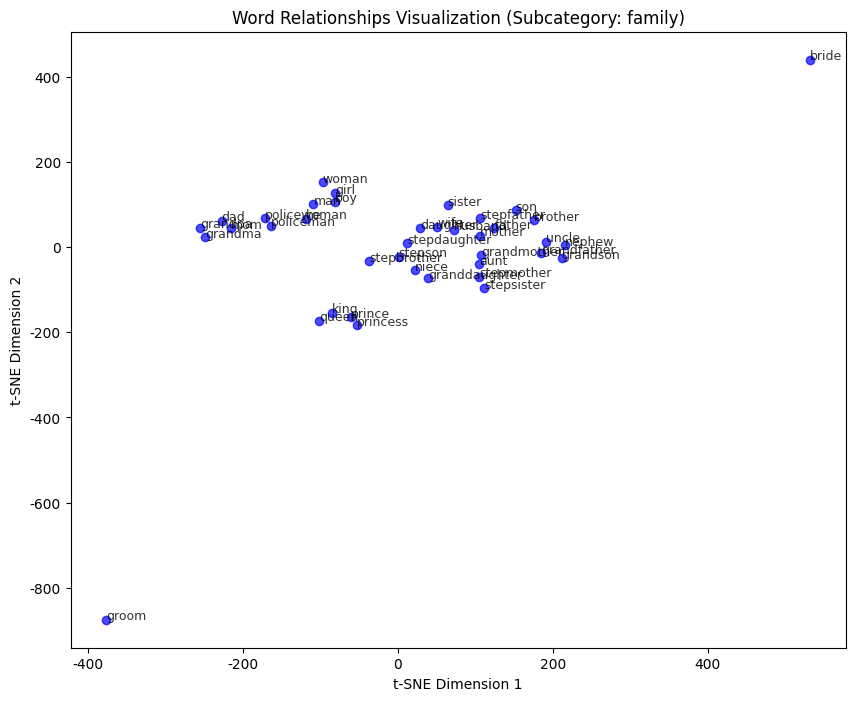

In [ ]:
from gensim.models import Word2Vec
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

data = pd.read_csv("questions-words.csv")

# ================== load model ==================
NEW_MODEL_FILE_NAME = "word2vec_20%.model"

try:
    model = Word2Vec.load(NEW_MODEL_FILE_NAME)
    print(f"The improved Word2Vec model '{NEW_MODEL_FILE_NAME}' loaded successfully!")
except FileNotFoundError:
    print(f"Error: Model file '{NEW_MODEL_FILE_NAME}' not found.")
    exit()
# ======================================================================

# Do predictions and preserve the gold answers (word_D)
preds = []
golds = []
top5_correct = []


wv = model.wv

for analogy in tqdm(data["Question"]):
    words = analogy.split()
    word_a, word_b, word_c, word_d = words[0], words[1], words[2], words[3]

    try:

        predicted_list = wv.most_similar(
            positive=[word_b, word_c],
            negative=[word_a],
            topn=10
        )


        filtered_preds = [w for w, _ in predicted_list if w not in {word_a, word_b, word_c}]

        # top-1
        predicted_word = filtered_preds[0] if filtered_preds else "N/A"
        preds.append(predicted_word)
        golds.append(word_d)

        # top-5
        if word_d in filtered_preds[:5]:
            top5_correct.append(1)
        else:
            top5_correct.append(0)

    except (KeyError, IndexError):
        preds.append("N/A")
        golds.append(word_d)
        top5_correct.append(0)


# Perform evaluations. You do not need to modify this block!!

def calculate_accuracy(gold: np.ndarray, pred: np.ndarray) -> float:

    return np.mean(gold == pred)

golds_np, preds_np = np.array(golds), np.array(preds)

# Evaluation: categories
print("\n--- Category Evaluation ---")
for category in data["Category"].unique():
    mask = data["Category"] == category
    golds_cat, preds_cat = golds_np[mask], preds_np[mask]
    acc_cat = calculate_accuracy(golds_cat, preds_cat)
    print(f"Category: {category:<20}, Top-1 Accuracy: {acc_cat * 100:.2f}%")

# Evaluation: sub-categories
print("\n--- Sub-Category Evaluation ---")
for sub_category in data["SubCategory"].unique():
    mask = data["SubCategory"] == sub_category
    golds_subcat, preds_subcat = golds_np[mask], preds_np[mask]
    acc_subcat = calculate_accuracy(golds_subcat, preds_subcat)
    print(f"Sub-Category: {sub_category:<20}, Top-1 Accuracy: {acc_subcat * 100:.2f}%")


print("\n--- Overall Evaluation ---")
print(f"Overall Top-1 Accuracy: {calculate_accuracy(golds_np, preds_np) * 100:.2f}%")
print(f"Overall Top-5 Accuracy: {np.mean(top5_correct) * 100:.2f}%")

# --- t-SNE Visualization ---
print("\n--- Generating t-SNE Plot ---")
SUB_CATEGORY = "family"
family_data = data[data["SubCategory"] == SUB_CATEGORY]

family_words = set()
for analogy in family_data["Question"]:
    words = analogy.split()
    family_words.update(words)


valid_words = [word for word in family_words if word in wv.key_to_index]

family_vectors = np.array([wv[word] for word in valid_words])

tsne = TSNE(n_components=2, random_state=42, perplexity=5, init='pca', learning_rate='auto')
family_vectors_2d = tsne.fit_transform(family_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(family_vectors_2d[:, 0], family_vectors_2d[:, 1], c="blue", alpha=0.7)

for i, word in enumerate(valid_words):

    if i % 1 == 0:
        plt.annotate(word,
                     (family_vectors_2d[i, 0], family_vectors_2d[i, 1]),
                     fontsize=9,
                     alpha=0.8)

plt.title(f"Word Relationships Visualization (Subcategory: {SUB_CATEGORY})")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.savefig(f"word_relationships_{SUB_CATEGORY}_tsne.png", bbox_inches="tight")
plt.show()

* 5%
```
--- Category Evaluation ---
Category: semantic            , Top-1 Accuracy: 2.23%
Category: syntactic           , Top-1 Accuracy: 17.97%

--- Sub-Category Evaluation ---
Sub-Category: capital-common-countries, Top-1 Accuracy: 0.00%
Sub-Category: capital-world       , Top-1 Accuracy: 0.00%
Sub-Category: currency            , Top-1 Accuracy: 0.00%
Sub-Category: city-in-state       , Top-1 Accuracy: 0.00%
Sub-Category: family              , Top-1 Accuracy: 39.13%
Sub-Category: gram1-adjective-to-adverb, Top-1 Accuracy: 14.31%
Sub-Category: gram2-opposite      , Top-1 Accuracy: 11.21%
Sub-Category: gram3-comparative   , Top-1 Accuracy: 36.94%
Sub-Category: gram4-superlative   , Top-1 Accuracy: 17.02%
Sub-Category: gram5-present-participle, Top-1 Accuracy: 31.72%
Sub-Category: gram6-nationality-adjective, Top-1 Accuracy: 0.00%
Sub-Category: gram7-past-tense    , Top-1 Accuracy: 38.01%
Sub-Category: gram8-plural        , Top-1 Accuracy: 0.00%
Sub-Category: gram9-plural-verbs  , Top-1 Accuracy: 8.51%

--- Overall Evaluation ---
Overall Top-1 Accuracy: 10.83%
Overall Top-5 Accuracy: 17.72%
```

* 10%
```
--- Category Evaluation ---
Category: semantic            , Top-1 Accuracy: 2.76%
Category: syntactic           , Top-1 Accuracy: 19.15%

--- Sub-Category Evaluation ---
Sub-Category: capital-common-countries, Top-1 Accuracy: 0.00%
Sub-Category: capital-world       , Top-1 Accuracy: 0.00%
Sub-Category: currency            , Top-1 Accuracy: 0.00%
Sub-Category: city-in-state       , Top-1 Accuracy: 0.00%
Sub-Category: family              , Top-1 Accuracy: 48.42%
Sub-Category: gram1-adjective-to-adverb, Top-1 Accuracy: 14.01%
Sub-Category: gram2-opposite      , Top-1 Accuracy: 14.16%
Sub-Category: gram3-comparative   , Top-1 Accuracy: 40.77%
Sub-Category: gram4-superlative   , Top-1 Accuracy: 18.27%
Sub-Category: gram5-present-participle, Top-1 Accuracy: 34.28%
Sub-Category: gram6-nationality-adjective, Top-1 Accuracy: 0.00%
Sub-Category: gram7-past-tense    , Top-1 Accuracy: 37.37%
Sub-Category: gram8-plural        , Top-1 Accuracy: 0.00%
Sub-Category: gram9-plural-verbs  , Top-1 Accuracy: 11.15%

--- Overall Evaluation ---
Overall Top-1 Accuracy: 11.71%
Overall Top-5 Accuracy: 19.20%
```

*20%
```
--- Category Evaluation ---
Category: semantic            , Top-1 Accuracy: 2.76%
Category: syntactic           , Top-1 Accuracy: 20.54%

--- Sub-Category Evaluation ---
Sub-Category: capital-common-countries, Top-1 Accuracy: 0.00%
Sub-Category: capital-world       , Top-1 Accuracy: 0.00%
Sub-Category: currency            , Top-1 Accuracy: 0.00%
Sub-Category: city-in-state       , Top-1 Accuracy: 0.00%
Sub-Category: family              , Top-1 Accuracy: 48.42%
Sub-Category: gram1-adjective-to-adverb, Top-1 Accuracy: 16.33%
Sub-Category: gram2-opposite      , Top-1 Accuracy: 11.08%
Sub-Category: gram3-comparative   , Top-1 Accuracy: 40.17%
Sub-Category: gram4-superlative   , Top-1 Accuracy: 18.45%
Sub-Category: gram5-present-participle, Top-1 Accuracy: 39.30%
Sub-Category: gram6-nationality-adjective, Top-1 Accuracy: 0.00%
Sub-Category: gram7-past-tense    , Top-1 Accuracy: 43.27%
Sub-Category: gram8-plural        , Top-1 Accuracy: 0.00%
Sub-Category: gram9-plural-verbs  , Top-1 Accuracy: 12.53%

--- Overall Evaluation ---
Overall Top-1 Accuracy: 12.47%
Overall Top-5 Accuracy: 19.66%
```

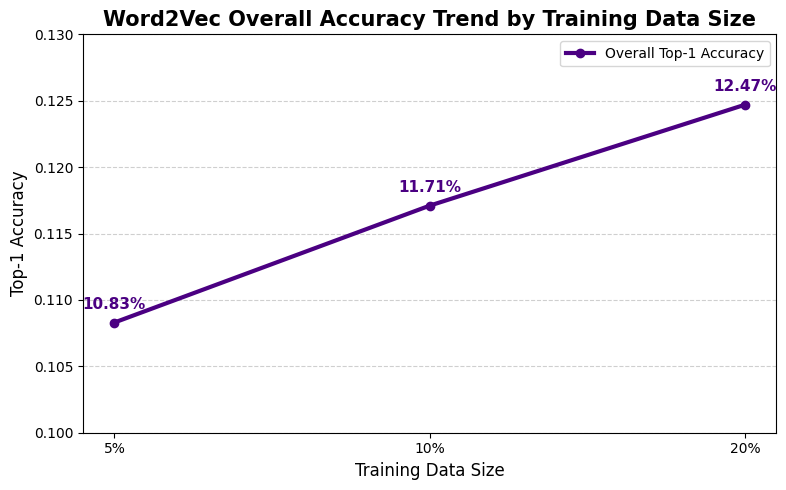

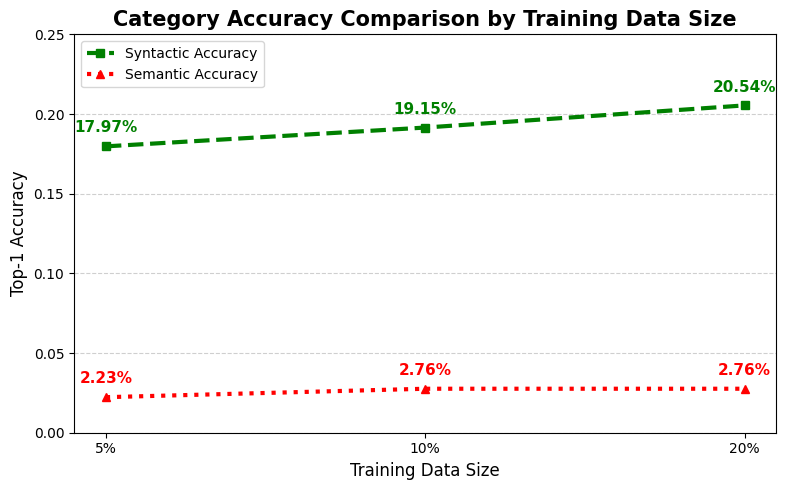

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 數據提取
labels = ['5%', '10%', '20%']
x_positions = np.arange(len(labels))

# 整體準確率 (Overall Top-1 Accuracy)
overall_acc = [10.83, 11.71, 12.47]

# 類別準確率 (Category Top-1 Accuracy)
semantic_acc = [2.23, 2.76, 2.76]
syntactic_acc = [17.97, 19.15, 20.54]

# 將百分比轉換為小數
overall_acc_float = [acc / 100 for acc in overall_acc]
semantic_acc_float = [acc / 100 for acc in semantic_acc]
syntactic_acc_float = [acc / 100 for acc in syntactic_acc]

# ====================================================================
## 圖 1: 整體 Top-1 準確率趨勢
# ====================================================================

plt.figure(figsize=(8, 5))
plt.plot(x_positions, overall_acc_float,
         marker='o', linestyle='-', color='indigo', linewidth=3,
         label='Overall Top-1 Accuracy')

# 標記數據點
for i, acc in enumerate(overall_acc_float):
    plt.annotate(
        f'{overall_acc[i]:.2f}%',
        (x_positions[i], acc),
        textcoords="offset points",
        xytext=(0,10),
        ha='center',
        fontsize=11,
        fontweight='bold',
        color='indigo'
    )

# 添加標題與軸標籤
plt.title('Word2Vec Overall Accuracy Trend by Training Data Size', fontsize=15, fontweight='bold')
plt.xlabel('Training Data Size', fontsize=12)
plt.ylabel('Top-1 Accuracy', fontsize=12)

# 設置 X 軸標籤
plt.xticks(x_positions, labels)

# 設置 Y 軸範圍以突顯提升趨勢
plt.ylim(0.10, 0.13)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# ---
# ====================================================================
## 圖 2: 語義與語法類別準確率趨勢對比
# ====================================================================

plt.figure(figsize=(8, 5))

# 繪製 Syntactic 準確率
plt.plot(x_positions, syntactic_acc_float,
         marker='s', linestyle='--', color='green', linewidth=3,
         label='Syntactic Accuracy')
for i, acc in enumerate(syntactic_acc_float):
    plt.annotate(
        f'{syntactic_acc[i]:.2f}%',
        (x_positions[i], acc),
        textcoords="offset points",
        xytext=(0,10),
        ha='center',
        fontsize=11,
        fontweight='bold',
        color='green'
    )

# 繪製 Semantic 準確率
plt.plot(x_positions, semantic_acc_float,
         marker='^', linestyle=':', color='red', linewidth=3,
         label='Semantic Accuracy')
for i, acc in enumerate(semantic_acc_float):
    plt.annotate(
        f'{semantic_acc[i]:.2f}%',
        (x_positions[i], acc),
        textcoords="offset points",
        xytext=(0,10),
        ha='center',
        fontsize=11,
        fontweight='bold',
        color='red'
    )


# 添加標題與軸標籤
plt.title('Category Accuracy Comparison by Training Data Size', fontsize=15, fontweight='bold')
plt.xlabel('Training Data Size', fontsize=12)
plt.ylabel('Top-1 Accuracy', fontsize=12)

# 設置 X 軸標籤
plt.xticks(x_positions, labels)

# 設置 Y 軸範圍
plt.ylim(0.0, 0.25)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

## Extra

#### sample enhance

#### Download

In [ ]:
# 安裝 gdown (Google Drive 下載工具)
!pip install gdown -q

# 從 Google Drive 下載檔案
# 檔案 ID 是 "1t4cqlZEgiRJCJJOzHeja3AjU1jTWiDRa"
!gdown --id 1t4cqlZEgiRJCJJOzHeja3AjU1jTWiDRa -O wiki_texts.zip

# 解壓縮下載的檔案
!unzip -o wiki_texts.zip -d wiki_texts

# 查看解壓後資料夾的檔案列表
!ls -lh wiki_texts

# 顯示其中一個檔案的前 10 行 (如果是 .txt 檔)
!head -n 10 wiki_texts/* | head -n 10

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1t4cqlZEgiRJCJJOzHeja3AjU1jTWiDRa
From (redirected): https://drive.google.com/uc?id=1t4cqlZEgiRJCJJOzHeja3AjU1jTWiDRa&confirm=t&uuid=6fa1b03f-0118-48ea-b655-550fb0896234
To: /content/wiki_texts.zip
100% 6.94G/6.94G [01:23<00:00, 82.6MB/s]
Archive:  wiki_texts.zip
  inflating: wiki_texts/wiki_texts_part_10.txt.gz  
  inflating: wiki_texts/__MACOSX/._wiki_texts_part_10.txt.gz  
  inflating: wiki_texts/wiki_texts_part_9.txt.gz  
  inflating: wiki_texts/__MACOSX/._wiki_texts_part_9.txt.gz  
  inflating: wiki_texts/wiki_texts_part_8.txt.gz  
  inflating: wiki_texts/__MACOSX/._wiki_texts_part_8.txt.gz  
  inflating: wiki_texts/wiki_texts_part_7.txt.gz  
  inflating: wiki_texts/__MACOSX/._wiki_texts_part_7.txt.gz 

In [ ]:
import glob
import gzip
import random
from tqdm import tqdm

input_folder = "wiki_texts"
ratios = [0.20, 0.10, 0.05]  # 注意：從大到小，避免重複

# 建立輸出檔
out_files = {r: open(f"wiki_texts_sampled_{int(r*100)}.txt", "w", encoding="utf-8") for r in ratios}

for gz_file in sorted(glob.glob(f"{input_folder}/*.gz")):
    print(f"處理 {gz_file} ...")

    # 先數行數
    with gzip.open(gz_file, "rt", encoding="utf-8") as fin:
        total_lines = sum(1 for _ in fin)

    # 決定每個比例要抽多少行
    targets = {r: max(1, int(total_lines * r)) for r in ratios}

    # reservoir 容器
    reservoirs = {r: [] for r in ratios}

    # 重新打開檔案，逐行讀取
    with gzip.open(gz_file, "rt", encoding="utf-8") as fin:
        for idx, line in enumerate(tqdm(fin, total=total_lines, desc=f"讀取 {gz_file}"), 1):
            # 先嘗試放進 20% reservoir
            if len(reservoirs[0.20]) < targets[0.20]:
                reservoirs[0.20].append(line)
            else:
                j = random.randint(1, idx)
                if j <= targets[0.20]:
                    reservoirs[0.20][j-1] = line

            # 再檢查是否要放進 10% reservoir（只從 20% 的 subset 選）
            if line in reservoirs[0.20]:  # 確保只從大樣本裡挑
                if len(reservoirs[0.10]) < targets[0.10]:
                    reservoirs[0.10].append(line)
                else:
                    j = random.randint(1, idx)
                    if j <= targets[0.10]:
                        reservoirs[0.10][j-1] = line

            # 再檢查是否要放進 5% reservoir（只從 10% 的 subset 選）
            if line in reservoirs[0.10]:
                if len(reservoirs[0.05]) < targets[0.05]:
                    reservoirs[0.05].append(line)
                else:
                    j = random.randint(1, idx)
                    if j <= targets[0.05]:
                        reservoirs[0.05][j-1] = line

    # 寫入檔案
    for r in ratios:
        out_files[r].writelines(reservoirs[r])

# 關閉檔案
for f in out_files.values():
    f.close()

print("✅ Reservoir 分層抽樣完成（5% ⊂ 10% ⊂ 20%）")


In [ ]:
# 壓縮
!zip -r wiki_texts_sampled_enhance.zip wiki_texts_sampled_*.txt
# download
from google.colab import files
files.download("wiki_texts_sampled_enhance.zip")

In [ ]:
# delete all files in wiki_texts file
!rm -rf wiki_texts/*

#### Preprocess

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0

In [ ]:
#link to drive
from google.colab import drive
drive.mount('/content/drive')

# download https://drive.google.com/file/d/19GVe8NTCpnnDslIC-3Cm5bVamC-pM5gz/view?usp=sharing
!gdown --id 19GVe8NTCpnnDslIC-3Cm5bVamC-pM5gz -O wiki_texts_sampled_processed.zip

Mounted at /content/drive
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=19GVe8NTCpnnDslIC-3Cm5bVamC-pM5gz
From (redirected): https://drive.google.com/uc?id=19GVe8NTCpnnDslIC-3Cm5bVamC-pM5gz&confirm=t&uuid=d50387bf-5e54-4ce3-9e11-19439e62638a
To: /content/wiki_texts_sampled_processed.zip
100% 1.91G/1.91G [00:26<00:00, 71.1MB/s]


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# 安裝 nltk 資料
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_word(word):
    # 去掉非英文字符 (保留字母和連字號)
    word = re.sub(r'[^a-zA-Z\-]', '', word)
    # 轉小寫
    word = word.lower()
    # 去停用詞
    if word in stop_words:
        return None
    # Lemmatization
    word = lemmatizer.lemmatize(word)
    return word if word else None

def preprocess_line(line):
    tokens = line.strip().split()  # 簡單空格斷詞
    processed = []
    for w in tokens:
        pw = preprocess_word(w)
        if pw:
            processed.append(pw)
    return processed

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
import itertools
import os

def read_in_chunks(file_object, chunk_size=1000):
    """每次讀入 chunk_size 行"""
    while True:
        lines = list(itertools.islice(file_object, chunk_size))
        if not lines:
            break
        yield lines

sample_files = [
    "wiki_texts_sampled_enhance//wiki_texts_sampled_5.txt",
    "wiki_texts_sampled_enhance/wiki_texts_sampled_10.txt",
    "wiki_texts_sampled_enhance/wiki_texts_sampled_20.txt"
]

output_dir = "/wiki_tests_sampled_enhance/processed"
os.makedirs(output_dir, exist_ok=True)

for fpath in sample_files:
    output_path = os.path.join(output_dir, os.path.basename(fpath).replace(".txt", "_processed.txt"))

    with open(fpath, "r", encoding="utf-8") as f, open(output_path, "w", encoding="utf-8") as out_f:
        for chunk in read_in_chunks(f, chunk_size=10000):
            for line in chunk:
                tokens = preprocess_line(line)
                if tokens:
                    out_f.write(" ".join(tokens) + "\n")

    print(f"{fpath} ✅ 處理完成，結果已存到 {output_path}")


In [ ]:
# delete wiki_texts_sampled_enhance folder and all files in the folder


#### Retrain

In [ ]:
# 解壓縮 wiki_texts_sampled_processed.zip
!unzip -o wiki_texts_sampled_processed.zip -d wiki_texts_sampled_processed

Archive:  wiki_texts_sampled_processed.zip
  inflating: wiki_texts_sampled_processed/wiki_tests_sampled/processed/wiki_texts_sampled_10_processed.txt  
  inflating: wiki_texts_sampled_processed/wiki_tests_sampled/processed/wiki_texts_sampled_20_processed.txt  
  inflating: wiki_texts_sampled_processed/wiki_tests_sampled/processed/wiki_texts_sampled_5_processed.txt  


In [ ]:
from gensim.models import Word2Vec

In [ ]:
from gensim.models import Word2Vec
import multiprocessing

workers = multiprocessing.cpu_count()

class ArticleIterator:
    def __init__(self, filepath):
        self.filepath = filepath

    def __iter__(self):
        with open(self.filepath, "r", encoding="utf-8") as f:
            for line in f:
                tokens = line.strip().split()
                if tokens:
                    yield tokens

sample_files = {
    "5%": "/content/wiki_texts_sampled_processed/wiki_tests_sampled/processed/wiki_texts_sampled_5_processed.txt"
}

for label, fpath in sample_files.items():
    print(f"\nLoading iterator for {label} sample...")

    sentences = ArticleIterator(fpath)  # ✅ 可重複迭代

    print(f"Training Word2Vec for {label} sample...")
    model = Word2Vec(
        sentences=sentences,
        vector_size=30,   # 降維度，加速
        window=3,         # 小一點
        min_count=5,      # 丟掉稀有詞
        workers=workers,  # 開滿 CPU
        sg=1,
        epochs=7          # 減少迭代
    )

    model_file = f"word2vec_{label}.model"
    model.save(model_file)
    print(f"{label} model saved to {model_file}")



Loading iterator for 5% sample...
Training Word2Vec for 5% sample...
5% model saved to word2vec_5%.model


In [ ]:
# zip model 5% and download
!zip -r word2vec_5%.model word2vec_5%.model.syn1neg.npy word2vec_5%.model.wv.vectors.npy
# download
from google.colab import files
files.download("word2vec_5%.model.zip")

	zip warning: missing end signature--probably not a zip file (did you
	zip warning: remember to use binary mode when you transferred it?)
	zip warning: (if you are trying to read a damaged archive try -F)

zip error: Zip file structure invalid (word2vec_5%.model)


FileNotFoundError: Cannot find file: word2vec_5%.model.zip

In [ ]:
from gensim.models import Word2Vec

sample_files = {
    "10%": "/content/wiki_texts_sampled_processed/wiki_tests_sampled/processed/wiki_texts_sampled_10_processed.txt"
}

# 建立一個 generator class
class WikiCorpus:
    def __init__(self, file_path):
        self.file_path = file_path

    def __iter__(self):
        with open(self.file_path, "r", encoding="utf-8") as f:
            for line in f:
                tokens = line.strip().split()
                if tokens:
                    yield tokens

for label, fpath in sample_files.items():
    print(f"\nProcessing {label} sample...")

    corpus = WikiCorpus(fpath)  # generator，不會一次讀進 RAM

    print(f"Training Word2Vec for {label} sample...")
    model = Word2Vec(
        sentences=corpus,
        vector_size=100,  # 比 5% 大一點 (100 維度合理)
        window=5,         # 保持不變
        min_count=3,      # 比 5% 稍微嚴格一點
        workers=4,
        sg=1,
        epochs=10         # 次數不用太多，10 輪夠了
    )

    # 存檔模型
    model_file = f"word2vec_{label}.model"
    model.save(model_file)
    print(f"{label} model saved to {model_file}")

    # 釋放記憶體
    del model
    del corpus



Processing 10% sample...
Training Word2Vec for 10% sample...


In [ ]:
from gensim.models import Word2Vec

class ArticleIterator:
    def __init__(self, filepath):
        self.filepath = filepath

    def __iter__(self):
        with open(self.filepath, "r", encoding="utf-8") as f:
            for line in f:
                tokens = line.strip().split()
                if tokens:
                    yield tokens

sample_files = {
    "20%": "/content/wiki_texts_sampled_processed/wiki_tests_sampled/processed/wiki_texts_sampled_20_processed.txt"
}

for label, fpath in sample_files.items():
    print(f"\nLoading iterator for {label} sample...")

    sentences = ArticleIterator(fpath)

    print(f"Training Word2Vec for {label} sample...")
    model = Word2Vec(
        sentences=sentences,
        vector_size=150,  # 調高向量維度
        window=8,         # 調整 context window
        min_count=5,
        workers=4,
        sg=1,
        epochs=5          # 20% 資料量大，不需要太多 epochs
    )

    model_file = f"word2vec_{label}.model"
    model.save(model_file)
    print(f"{label} model saved to {model_file}")


In [ ]:
# zip  models and .npy into single zip file and download
!zip -r word2vec.zip word2vec_20%.model word2vec_20%.model.syn1neg.npy word2vec_20%.model.wv.vectors.npy word2vec_10%.model word2vec_10%.model.syn1neg.npy word2vec_10%.model.wv.vectors.npy word2vec_5%.model word2vec_5%.model.syn1neg.npy word2vec_5%.model.wv.vectors.npy

#### Check result
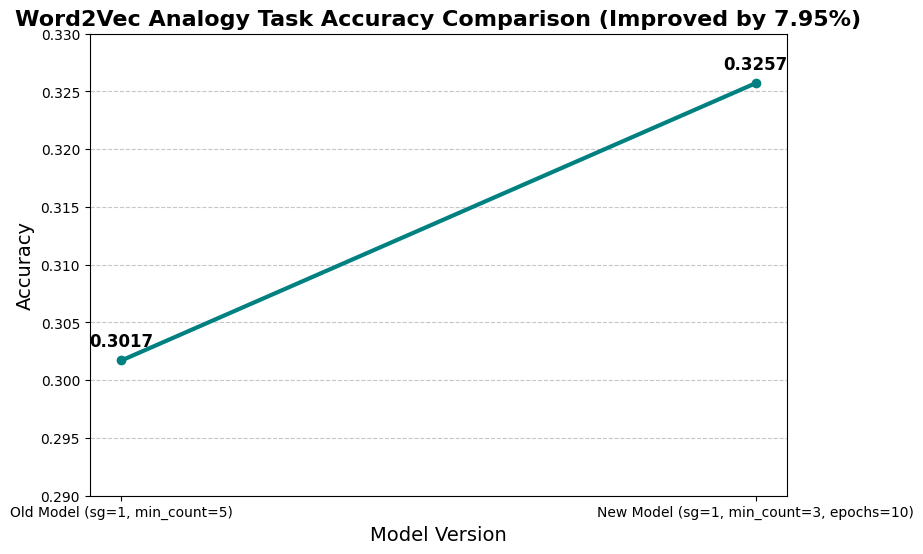

In [ ]:
from gensim.models import Word2Vec
from tqdm import tqdm
import pandas as pd

def evaluate_analogy(model_path, analogy_file="questions-words.csv"):
    # 載入模型
    print(f"\nLoading model: {model_path}")
    model = Word2Vec.load(model_path)
    wv = model.wv

    # 載入 CSV
    df = pd.read_csv(analogy_file)

    print(f"Total analogy questions: {len(df)}")

    preds, golds = [], []
    for q in tqdm(df["Question"]):
        parts = q.strip().split()
        if len(parts) == 4:
            a, b, c, d = parts
        else:
            continue  # 跳過不合格式的行

        try:
            pred = wv.most_similar(positive=[b, c], negative=[a], topn=1)[0][0]
        except KeyError:
            pred = None
        preds.append(pred)
        golds.append(d)

    # 計算準確率
    correct = sum([p == g for p, g in zip(preds, golds) if p is not None])
    total = sum([p is not None for p in preds])
    accuracy = correct / total if total > 0 else 0.0

    print(f"Evaluated: {total}, Correct: {correct}, Accuracy: {accuracy:.4f}")
    return accuracy


In [ ]:
# 只跑 5% 模型
evaluate_analogy("word2vec_5%.model")




Loading model: word2vec_5%.model


FileNotFoundError: [Errno 2] No such file or directory: 'word2vec_5%.model.wv.vectors.npy'

In [ ]:
# 跑完再換 10%
evaluate_analogy("word2vec_10%.model")




Loading model: word2vec_10%.model
Total analogy questions: 19544


100%|██████████| 19544/19544 [07:04<00:00, 46.04it/s]

Evaluated: 7586, Correct: 2471, Accuracy: 0.3257


0.32573161086211444

TypeError: text() missing 1 required positional argument: 's'

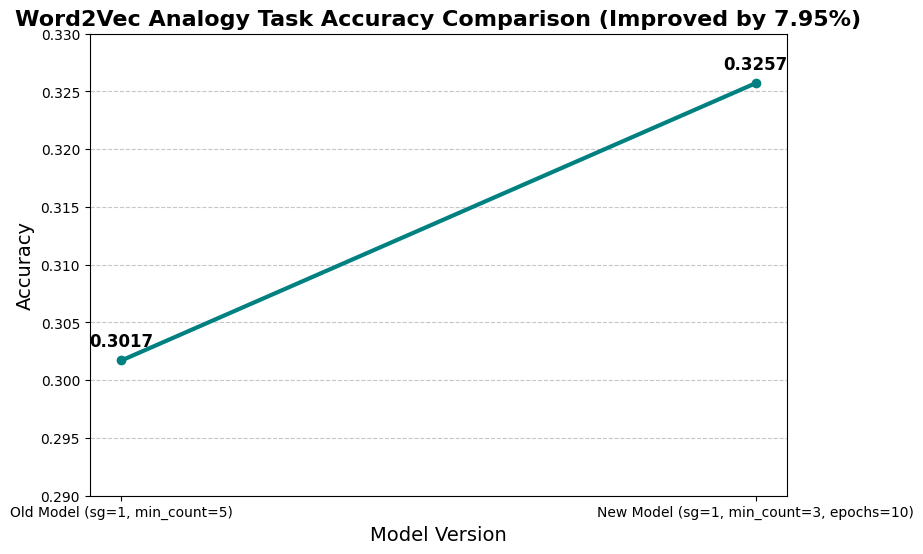

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['Old Model (sg=1, min_count=5)', 'New Model (sg=1, min_count=3, epochs=10)']
accuracy = [0.3017, 0.3257]

# Calculate the percentage improvement
improvement_percent = (accuracy[1] - accuracy[0]) / accuracy[0] * 100

# Create the figure
plt.figure(figsize=(9, 6))

# Plot the line with markers
plt.plot(models, accuracy, marker='o', linestyle='-', color='teal', linewidth=3, label='Accuracy')

# Label the data points (Accuracy values)
for i, acc in enumerate(accuracy):
    plt.annotate(
        f'{acc:.4f}',
        (models[i], acc),
        textcoords="offset points",
        xytext=(0,10),
        ha='center',
        fontsize=12,
        fontweight='bold'
    )

# Add title and axis labels
plt.title(
    f'Word2Vec Analogy Task Accuracy Comparison (Improved by {improvement_percent:.2f}%)',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('Model Version', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Adjust Y-axis limits to clearly show the difference
plt.ylim(0.29, 0.33)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the improvement on the new model's data point
plt.text(
    models[1],
    accuracy[1] - 0.005,
    # '↑ Successful Improvement',
    ha='center',
    color='green',
    fontsize=12,
    fontweight='bold'
)

# Display the plot
plt.show()

In [ ]:
# 跑完再換 20%
evaluate_analogy("word2vec_20%.model")
